# <center><em><span style="color : #233E8B; font-family : Monaco;">EDA & MACHINE MODELLING - "DIABETES PREDICTION"</span></em></center>
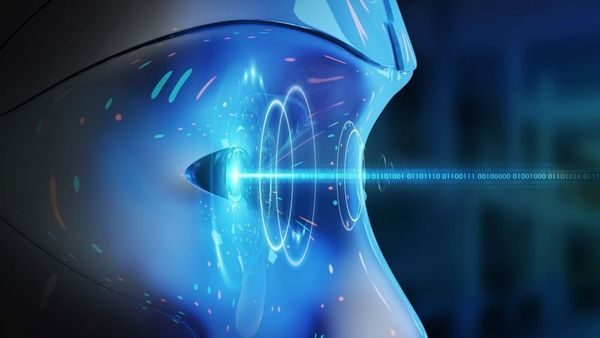

In [1]:
# importing libraries

import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatch
import missingno as msno
import warnings


# ignore warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

## <center><span style="color : #81B214"> *Dataset Preparation*</span></center>

In [102]:
# loading dataset

diabetes_kaggle_url = 'https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv'
od.download(diabetes_kaggle_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shubhamjaiswal01
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 8.91k/8.91k [00:00<00:00, 3.02MB/s]

### Features of the Dataset :
>***Pregnancies*** : Number of times pregnant. \
>***Glucose*** : Plasma Glucose Concentration (mg/dl). \
>***Blood Pressure*** : Diastolic Blood Pressure (mm Hg). \
>***Skin Thickness*** : Triceps skin fold thickness (mm). \
>***Insulin*** : 2hr Serum Insulin (mu U/ml). \
>***BMI*** : Body Mass Index (weight in kg/ (height in m)<sup>2</sup>). \
>***Diabetes Pedigree Function*** :Gives data about diabetes history in family and genetics. \
>***Age*** : age (in years). \
>***Outcome*** : Class variables( 0 or 1)
>> 0=Non-diabetics, 1=Diabetics

In [2]:
# reading dataset

diabetes_df=pd.read_csv('./pima-indians-diabetes-database/diabetes.csv')

## <center><span style="color : #81B214">*Data Exploration and Visualization*</span></center>

In [3]:
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# inference --->
    # many zeros are present in the dataset
    # pregancies columns mostly have non-zero values, indicating all are female cases

### # Information of the Dataset

In [6]:
diabetes_df.info()

# inference --->
    # dataset has 768 records and 9 features
    # small dataset having limited records and features.....so, not be dropping any of tuples or columns
    # among the 9 attributes---> 8 : Predictors
    #                            1 : target attribute(Outcome)
    # All variables are of numerical data type.....so no need of data-type conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### # Visualization the Data types

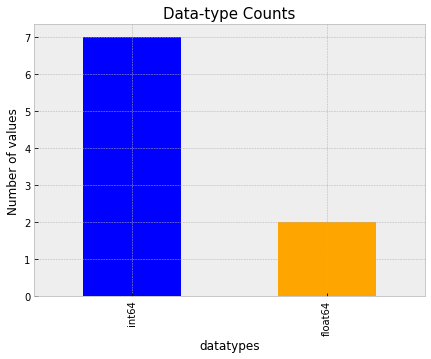

In [7]:
data_types = diabetes_df.dtypes.value_counts()

with plt.style.context('bmh'):
    plt.figure(figsize = (7,5))
    plt.title('Data-type Counts', fontsize = 15)

    data_types.plot.bar(color = ['blue','orange'], 
                        xlabel = 'datatypes',
                        ylabel = 'Number of values');

#inference---> 
    # 7 columns :integer type
    # 2 columns :float type

### # Statistical Information of the dataset

In [8]:
diabetes_df.iloc[:,:-1].describe(percentiles = [.25,.50]).T

# inference --->
    # count : indicates there are no missing values in dataset
    # std : Insulin has very high standard deviation suggesting that the data is spread over a wider range
    # min : maximum columns has zer0 as the minimum value, which seems to be invalid except Pregnancies column.
    # 25% (percentile) : 25% data of Insulin and SkinThickness have values less than 0,which is unusual

# NOTE : features like Glucose, BloodPressure, SkinThickness, Insulin, BMI can never have zero value

,count,mean,std,min,25%,50%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,81.00


### # Missing value identification

In [9]:
pd.DataFrame(diabetes_df.isna().sum(),
            columns = ['Number of null values'])

#inference---> Great,No missing data in any of the attributes in dataset.

,Number of null values
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


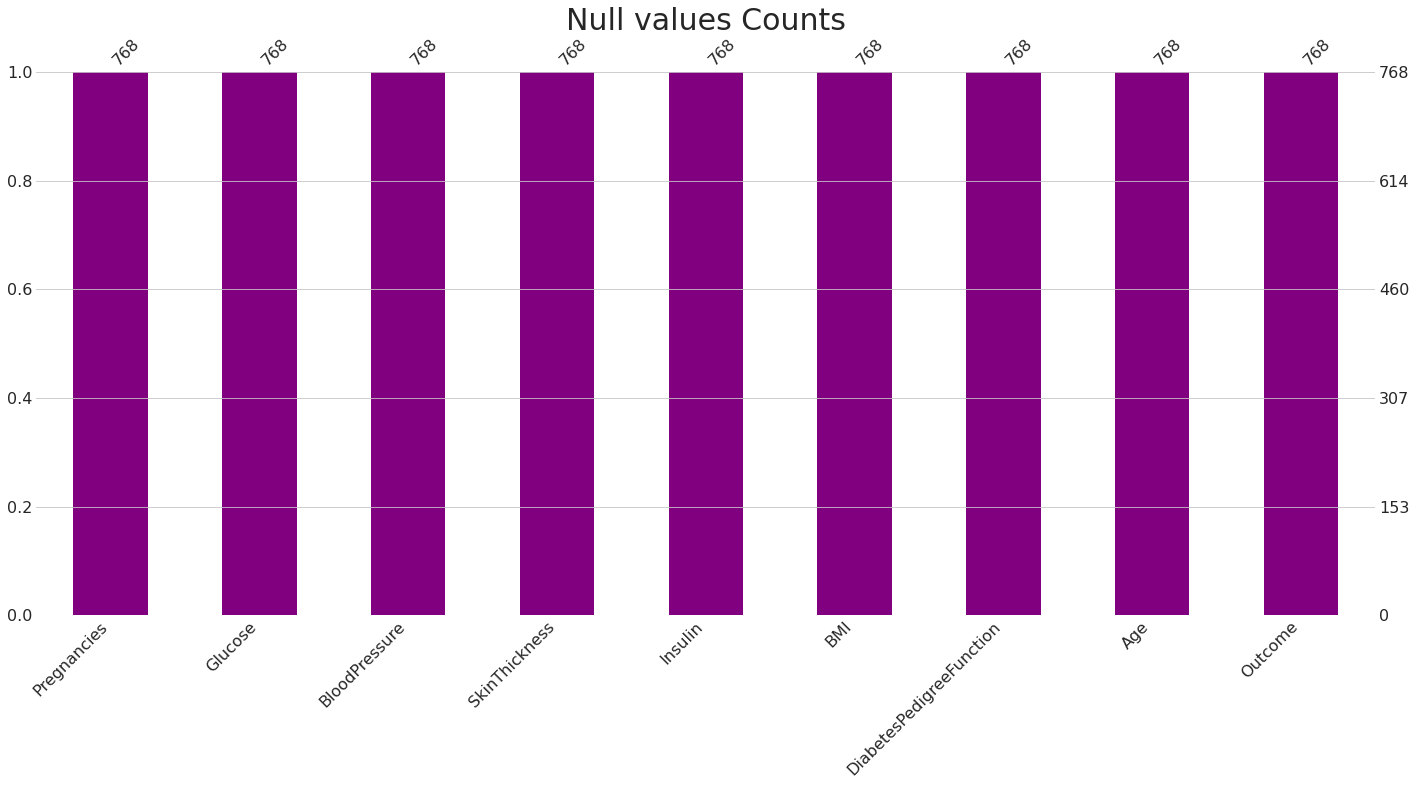

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.title('Null values Counts',fontsize = 30)

    msno.bar(df = diabetes_df, color = ['purple']);

### # Finding zero values in Dataset

In [11]:
zero_count = list()

for feature in diabetes_df.columns[:-1]:
    count = len(diabetes_df[diabetes_df[feature] == 0])
    zero_count.append(count)

zero_value_df = pd.DataFrame(list(zip(diabetes_df.columns[:-1], zero_count)),
                            index = range(1,9),
                            columns = ['Features', 'Total zero count'])
zero_value_df

,Features,Total zero count
1,Pregnancies,111
2,Glucose,5
3,BloodPressure,35
4,SkinThickness,227
5,Insulin,374
6,BMI,11
7,DiabetesPedigreeFunction,0
8,Age,0


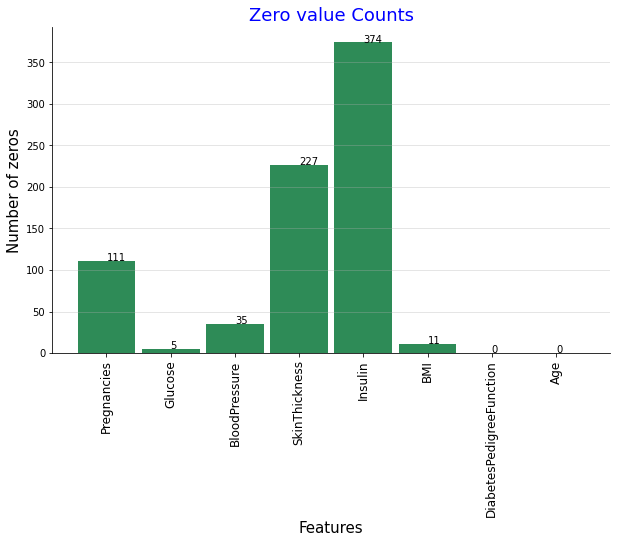

In [12]:
plt.figure(figsize = (10,6))
plt.title('Zero value Counts', fontsize = 18, color = 'b')

plt.bar(x = zero_value_df['Features'],
        height = zero_value_df['Total zero count'],
        width = 0.9, 
        color = 'seagreen')

plt.grid(axis='y',alpha=0.4)
plt.xlabel('Features',fontsize = 15)
plt.ylabel('Number of zeros',fontsize = 15)
plt.xticks(rotation=90, fontsize = 12);
sns.despine()

for xloc,text in enumerate(zero_count):
    plt.text(x = xloc, y = text, s = str(text))

In [13]:
# inference---> 
    # Zer0 value is only possible for Pregnancies column, and does not make sense in other columns indicating invalid values.
    # Attributes like Glucose, BP, BMI,etc can never be zero for a living person
    # Insulin and Skinthickness has very high zero counts in dataset
    # seems that missing values are represented in the form of zeros in Dataset

### # Replacing invalid zeros with NaN

In [14]:
# making copy of dataframe
diabetes_copy_df = diabetes_df.copy(deep = True)

invalid_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_copy_df[invalid_zero_columns] = diabetes_df[invalid_zero_columns].replace(0,np.NaN)

In [15]:
diabetes_copy_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [16]:
# counting null values

pd.DataFrame(diabetes_copy_df.isnull().sum(),
            columns = ['Number of null values'])

,Number of null values
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


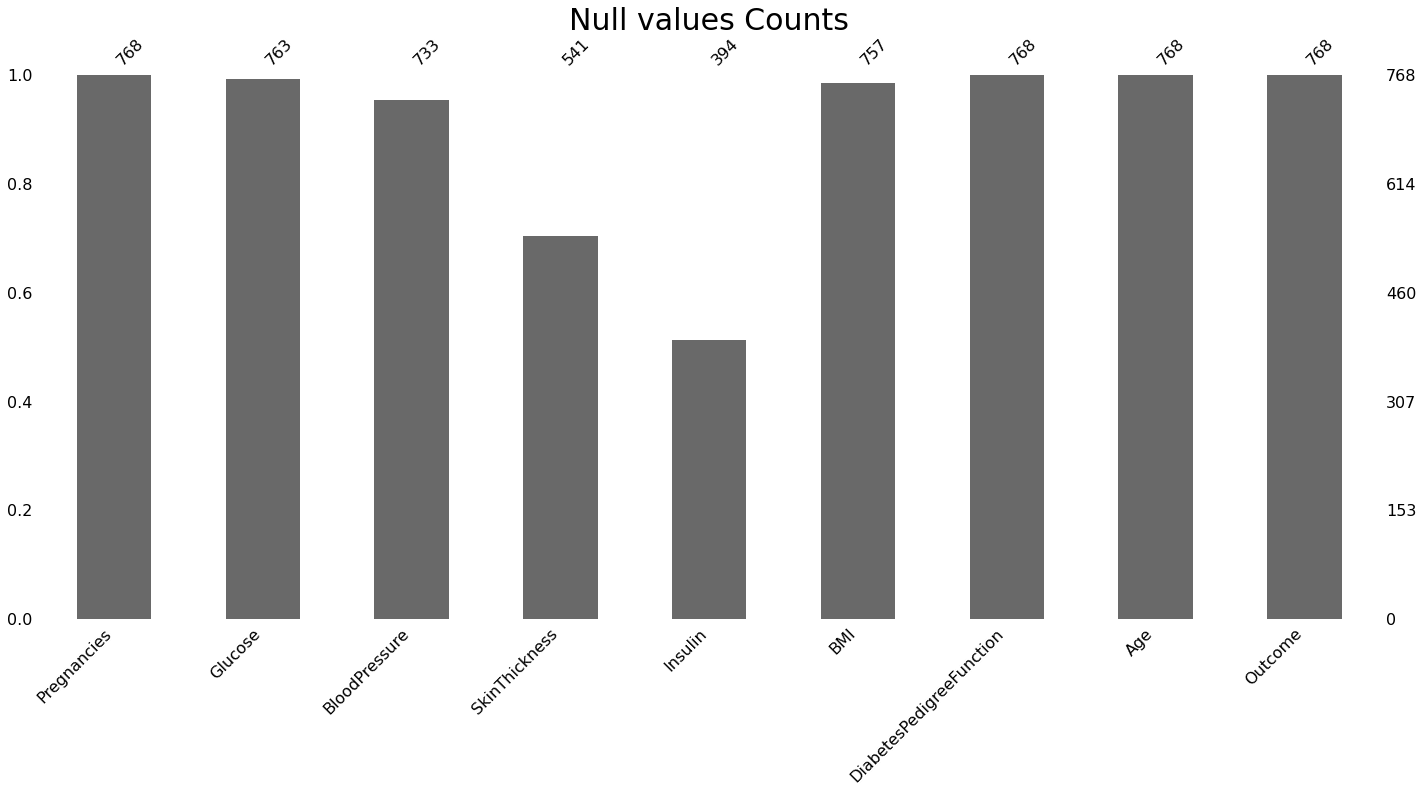

In [17]:
plt.title('Null values Counts',fontsize = 30)
msno.bar(df = diabetes_copy_df);

# inference ---> upper values shows the count of non-null rows

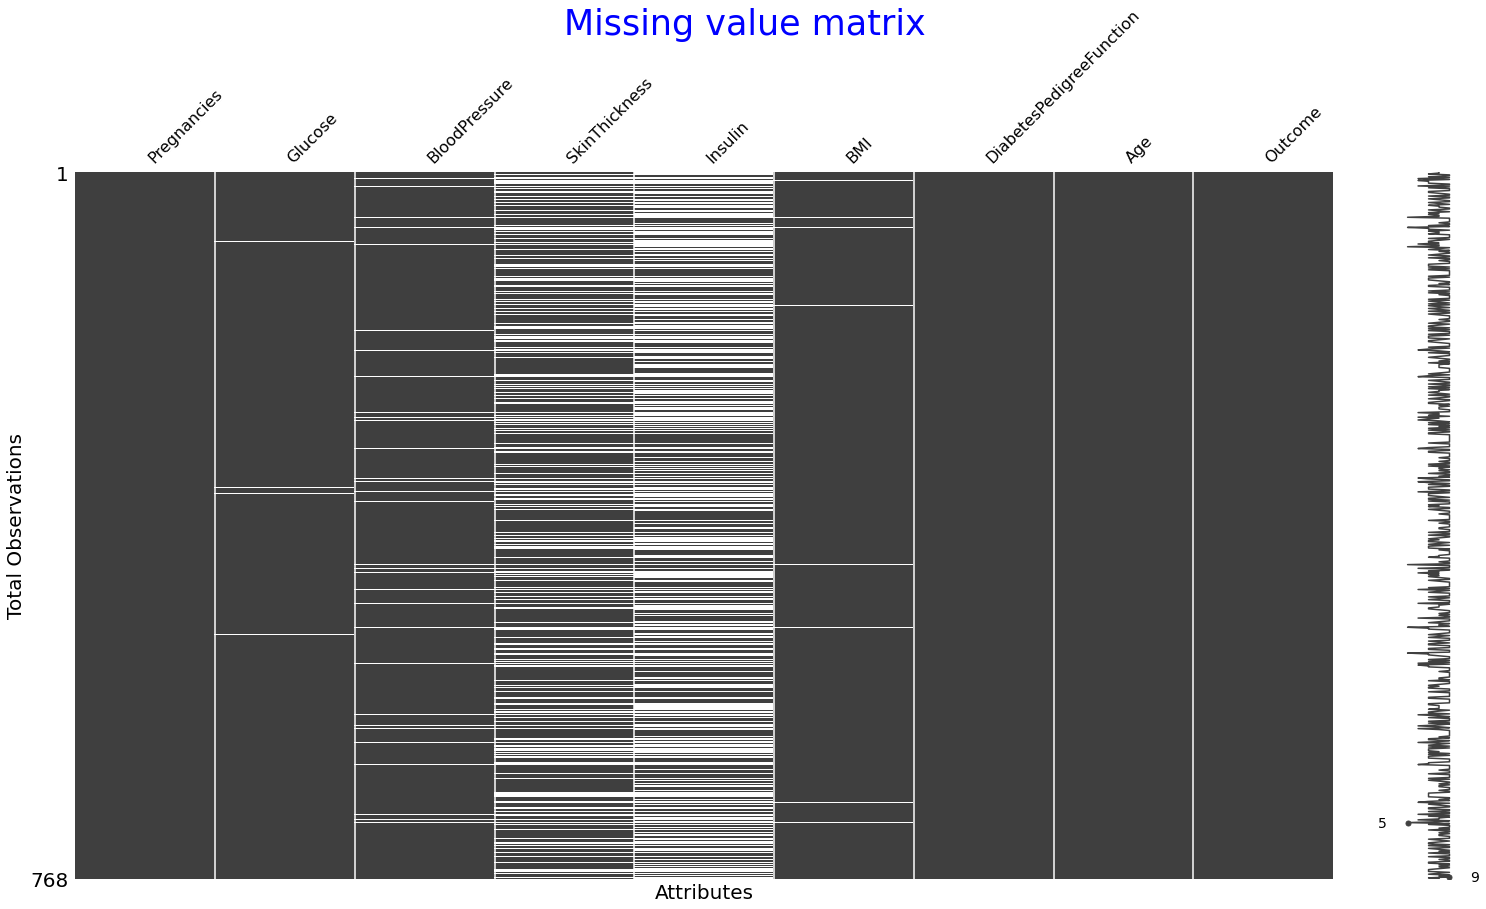

In [18]:
msno.matrix(diabetes_copy_df, figsize = (25,13));

plt.ylabel('Total Observations',fontdict = {'fontsize':20})
plt.xlabel('Attributes',fontdict = {'fontsize':20});
plt.text(3,-150, s = 'Missing value matrix', fontdict = {'size':35, 'color':'b'});

# inference --->
    # all white horizontal plots represents missing values
    # for instance, Glucose column has 5 blanks
    # about half of rows for SkinThickness & Insulin has missing values

    # plot to extreme right indicates 5 out of 9 columns has missing values

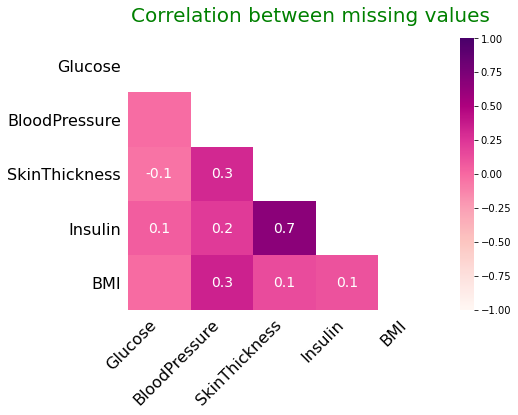

In [19]:
msno.heatmap(diabetes_copy_df, figsize = (7,5), cmap = 'RdPu');
plt.text(.05,-0.3, s = 'Correlation between missing values', fontdict = {'size':20, 'color':'g'});

# inference ---> SkinThickness & Insulin are highly correlated with value=0.7 , indicating that data are not missing randomly

### # Number of Unique values in dataset

In [20]:
diabetes_df.nunique().to_frame(name='Total Unique values')

# inference ---> dataset includes 52 age groups of people 

,Total Unique values
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


### # Distribution of target variable

In [21]:
diabetes_class = diabetes_df[diabetes_df.Outcome == 1]
healthy_class = diabetes_df[diabetes_df.Outcome == 0]

In [22]:
diabetes_class

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [23]:
healthy_class

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


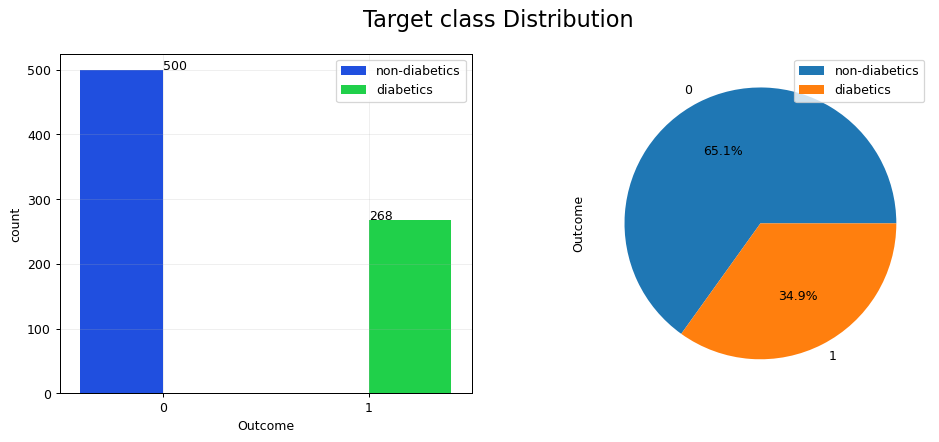

In [24]:
outcome_class = diabetes_df['Outcome'].value_counts().values

plt.figure(figsize = (13,5), dpi = 90)
plt.suptitle('Target class Distribution',fontsize = 18) 

# barplot
plt.subplot(1,2,1)
with plt.style.context('seaborn-bright'):
    ax = sns.countplot(x = 'Outcome', data = diabetes_df, hue = 'Outcome')
    ax.legend(['non-diabetics', 'diabetics']);
    ax.grid(alpha = 0.2)
    
    for xloc,text in enumerate(outcome_class):
        plt.text(x = xloc, y = text, s = str(text))
  
# pieplot
plt.subplot(1,2,2)
#with plt.style.context('seaborn-colorblind'):
diabetes_df['Outcome'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')
plt.legend(['non-diabetics', 'diabetics']);
    
# inference---> 
    # Graph indicates dataset is somewhat unbalanced
    # 500 : non-diabetics & 268 : diabetics records
    # which specifies dataset contain more non-diabetes cases than diabetes

### # Univariate Analysis Before Data Cleaning : To find distribution of the variable

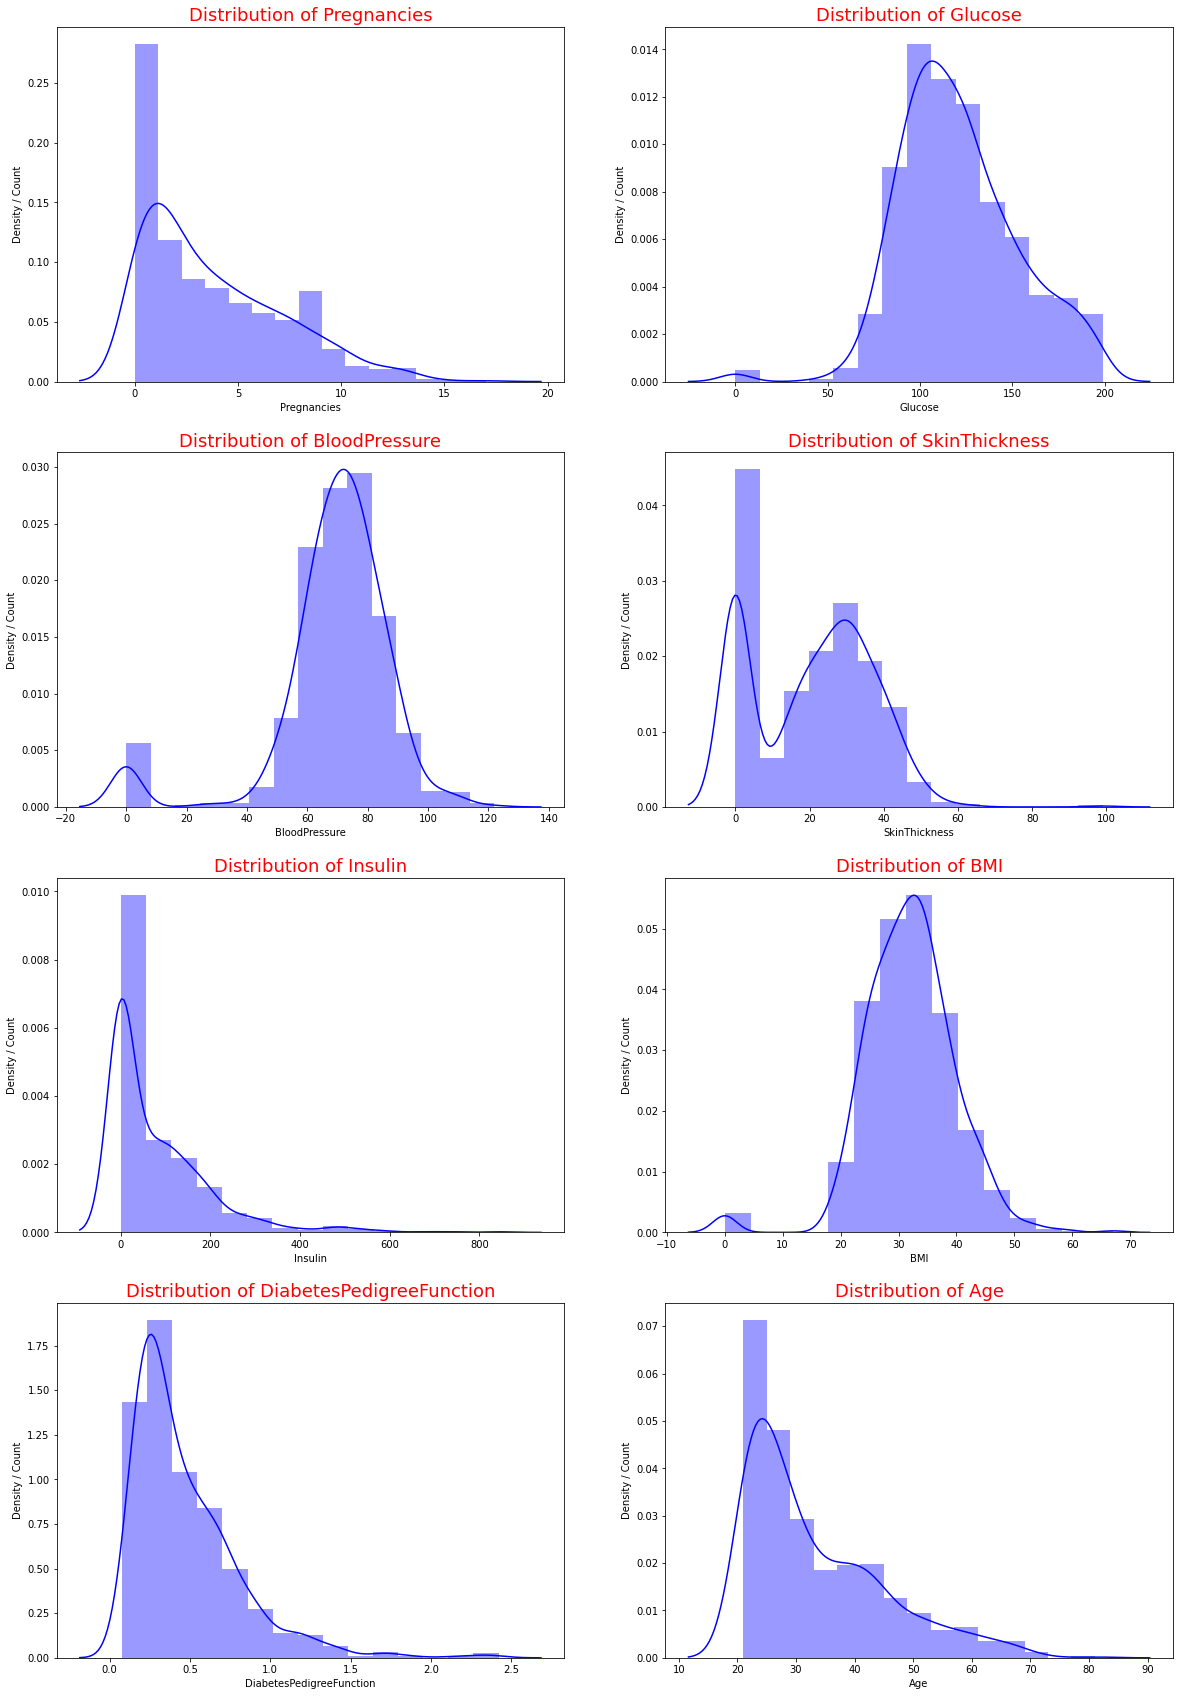

In [25]:
# histogram and kde plot

plt.figure(figsize=(20,30))

for index,feature in enumerate(diabetes_df.columns[:-1]):
    plt.subplot(4,2,index+1)
    plt.title(f'Distribution of {feature}',fontdict = {'fontsize':18, 'color':'r'})
    
    sns.distplot(a = diabetes_df[feature],
                 hist = True,
                 kde = True,
                 bins = 15,
                color = 'blue')
    plt.ylabel('Density / Count')
    
# inference ---> 
    # Pregnancy variable has very high bar of ~250 records in range 0-1 & maximum of records are spreaded in range of 2-6
    # Glucose variable : much of cases are distributed in range 90-130
    # BP column has almost all records in range 55-90
    # SkinThickness : has very high bar in range(0-5)
    # Insulin : has very high bar in range(0-100)
    # BMI : like BP, data is spread in middle
    # **********************THIS ALL LIKELY TO BE DATA-ENTRY ERROR*************************

In [26]:
# inference --->
    # Gluocse, BP, BMI follows Gaussian Distribution
    # Pregnancies, Insulin, DiabetesPedigreeFunction, Age show positive skewness (right skewed)
    
# NOTE : All features have different scales(range) i.e.needs to be normalized / standardized

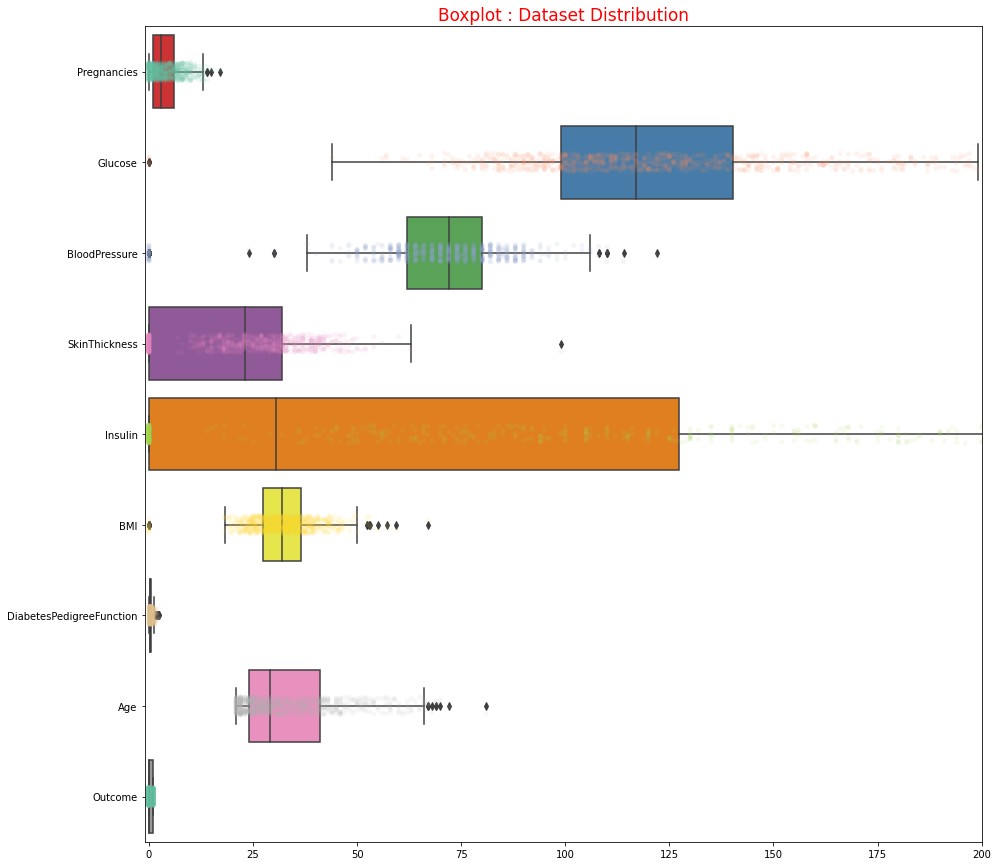

In [27]:
# boxplot
plt.figure(figsize=(15,15))
plt.title("Boxplot : Dataset Distribution",fontsize=17,color='r')

sns.boxplot(data=diabetes_df,orient='h',palette='Set1')
sns.stripplot(data=diabetes_df,orient='h',alpha=.1,palette='Set2')

plt.xlim(-1,200);

# inference ---> 
    # Glucose, BP,SkinThickness, BMI shows outliers
    # observing the median values and quartiles
    # Insulin has long whiskers towards right, but has median value at extreme left
    # SkinThickness & Insulin doesn't have whiskers at left suggesting maximum values start a zer0

### # Bivariate Analysis

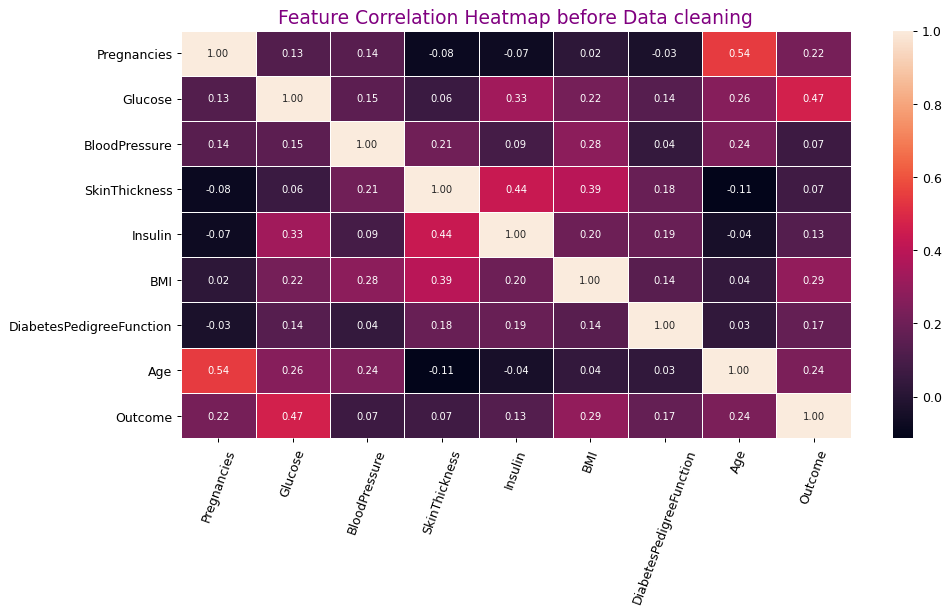

In [28]:
# Visualizing Correlation with heatmap :

plt.figure(figsize=(12,6),dpi=90)
plt.title('Feature Correlation Heatmap before Data cleaning',fontsize=15,color='purple')

sns.heatmap(diabetes_df.corr(),
            annot=True,
            annot_kws={'size':8},
            fmt='.2f',
            cmap='rocket',
            linewidths=.5);

plt.xticks(rotation=70);

# inference---> 
    ## Looking at the last column :
        ## Outcome is highly dependent on Glucose-level, as it has very high correlation value.
        ## BMI, Pregnancies, Age also have good correlation with Outcome indicating they also play a vital role in prediction.
    
    ## Now,Focusing inside the matrix :
        ## In addition, Glucose shows strong relation with Insulin.
        ## Likewise, Insulin, BMI also shows good correlation with SkinThickness.
        ## Besides, Pregnancies and Age also has correlation value=0.54 suggesting it may have some effect on Outcome.

## Final conclusion for filling null values :

### Attributes following Gaussian Distribution :
> Since, **Gluocse, BMI**, BP has approx Bell-Shaped curve, so missing values will be filled with their respective **medians**.
> But by observing histogrm of **BP**, we get... BP has more NaN values as compared to Glucose & BMI, so we'll fill it with **mean**.

### Attributes which do not Gaussian Distribution :
> **SkinThickness & Insulin** should be filled with their mean values.
> But by observing histogrm of both attributes, we get...that both of them has nearly half rows missing.
> So, filling with mean values will result in variation of data....hence,we'll **predict their values by correlating with other features**.

## <center><span style="color : #81B214">*Data Cleaning*</span></center>

In [29]:
# separating the target class

diabetes_copy_class = diabetes_copy_df[diabetes_copy_df.Outcome == 1]
healthy_copy_class = diabetes_copy_df[diabetes_copy_df.Outcome == 0]

In [30]:
# helper function for plotting distplot()

def density_plot(column):
    plt.figure(figsize=(8,5), dpi = 90)
    plt.title(f'{column} Concentration of Diabetics and Healthy People', fontdict = {'fontsize':18, 'color':'r'})

    sns.distplot(diabetes_copy_class[column], color='#FFD700')    # for diabetics
    sns.distplot(healthy_copy_class[column], color='#7EC0EE')     # for non-diabetics
    
    plt.legend(['Diabetic','Non-diabetic'])

In [31]:
# helper function for finding median()

def calc_median(column):
    Outcome_1 = diabetes_copy_class[column].median()
    Outcome_0 = healthy_copy_class[column].median()

    return (Outcome_1,Outcome_0)    # diabetes, non-diabetes

### 1. Glucose 

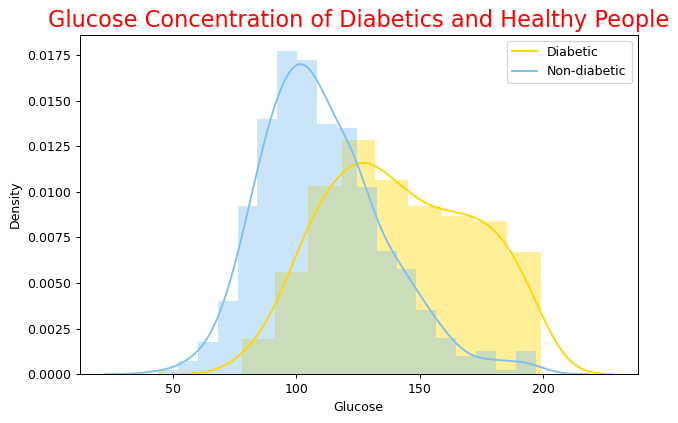

In [32]:
# As, we have unbalanced dataset, so filling zeros by analyzing the density of Glucose with target(i.e. Outcome) variable

density_plot('Glucose')

# inference---> 
    # so,people having more concentration of Glucose are more prone to Diabetes
    # hence,finding median values separately for diabetics and non-diabetics cases.....
    # And filling in the Glucose column respectively

In [33]:
# finding median values for Glucose by grouping Target class

median_values = calc_median('Glucose')

pd.DataFrame({'Outcome':[1,0],
             'median':[median_values[0],median_values[1]],
             'Missing values':[diabetes_copy_class['Glucose'].isnull().sum(), healthy_copy_class['Glucose'].isnull().sum()]},
            index = ['diabetics','healthy'])

,Outcome,median,Missing values
diabetics,1,140.0,2
healthy,0,107.0,3


In [34]:
# filling the NaN values in Glucose column

diabetes_copy_class = diabetes_copy_class.fillna({'Glucose':median_values[0]})
healthy_copy_class = healthy_copy_class.fillna({'Glucose':median_values[1]})

### 2. BMI

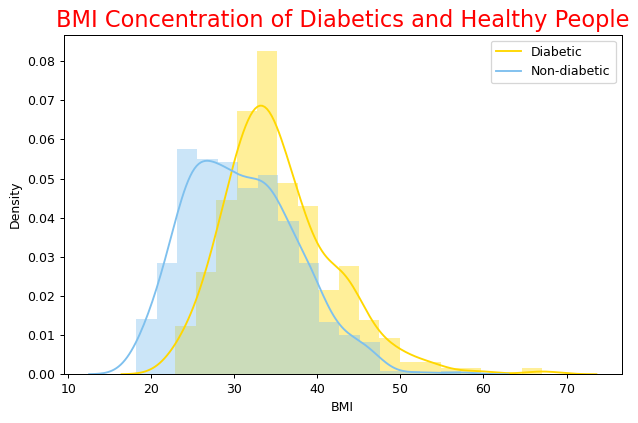

In [35]:
# Similarly, analyzing the density of BMI with target(i.e. Outcome) variable

density_plot('BMI')

# inference---> 
    # here, also density distribution seems to be different for diabetics and non-diabetics
    # hence,finding median values separately for diabetics and non-diabetics cases.....
    # And filling in the BMI column respectively

In [36]:
# finding median values for BMI by grouping Target class

median_values = calc_median('BMI')

pd.DataFrame({'Outcome':[1,0],
             'median':[median_values[0],median_values[1]],
             'Missing values':[diabetes_copy_class['BMI'].isnull().sum(), healthy_copy_class['BMI'].isnull().sum()]},
            index = ['diabetics','healthy'])

,Outcome,median,Missing values
diabetics,1,34.3,2
healthy,0,30.1,9


In [37]:
# filling the NaN values in BMI column

diabetes_copy_class = diabetes_copy_class.fillna({'BMI':median_values[0]})
healthy_copy_class = healthy_copy_class.fillna({'BMI':median_values[1]})

### 3. Blood Pressure 

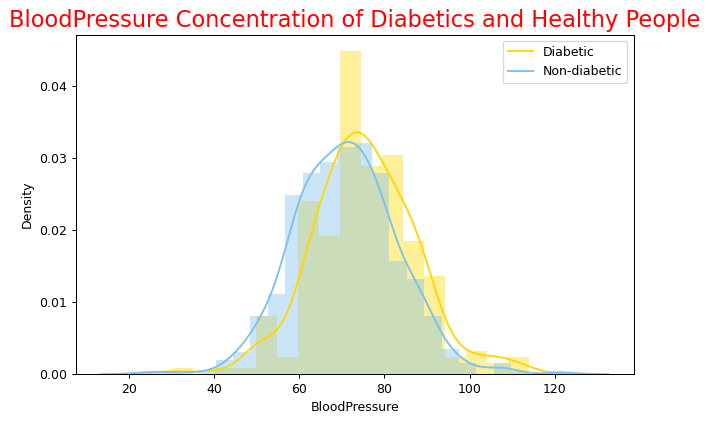

In [38]:
density_plot('BloodPressure')

# inference---> 
    # hence,finding median values separately for diabetics and non-diabetics cases.....
    # And filling in the BMI column respectively

In [39]:
# Calculating the mean of BP column for only non-zero values and filling in BP column

Outcome_1 = diabetes_copy_class['BloodPressure'].mean()
Outcome_0 = healthy_copy_class['BloodPressure'].mean()

pd.DataFrame({'Outcome':[1,0],
             'mean':[Outcome_1, Outcome_0],
             'Missing values':[diabetes_copy_class['BloodPressure'].isnull().sum(), healthy_copy_class['BloodPressure'].isnull().sum()]},
            index = ['diabetics','healthy'])

,Outcome,mean,Missing values
diabetics,1,75.321429,16
healthy,0,70.877339,19


In [40]:
# filling the NaN values in BP column

diabetes_copy_class = diabetes_copy_class.fillna({'BloodPressure':Outcome_1})
healthy_copy_class = healthy_copy_class.fillna({'BloodPressure':Outcome_0})

***Concatenating the two DataFrames to diabetes_copy_df***

In [41]:
diabetes_copy_df = diabetes_copy_class.append(healthy_copy_class).sort_index()

In [42]:
# checking whether the missing values are handled, except SkinThickness & Insulin

diabetes_copy_df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

***Visualizing Correlation matrix (patterns) for filling SkinThickness & Insulin Column***

In [43]:
# ignoring the missing values in SkinThickness & Insulin Column & creating new new DataFrame

filtered_df = diabetes_copy_df.dropna()
filtered_df

# inference ---> only 394 records with non-null values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


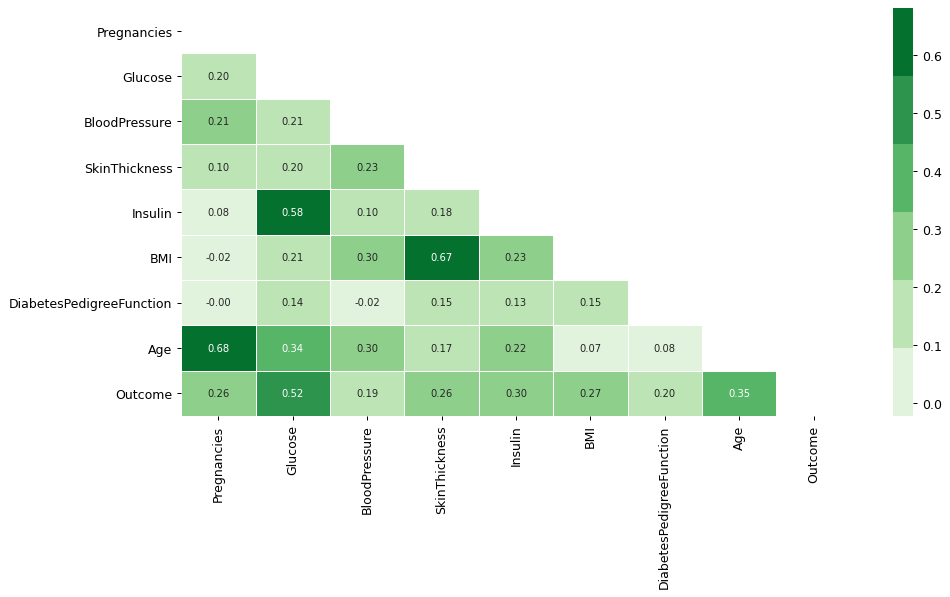

In [44]:
# observing whether SkinThickness & Insulin are related with other variables

plt.figure(figsize=(12,6),dpi=90)
corr_matrix = filtered_df.corr()

sns.heatmap(corr_matrix,
            annot=True,
            annot_kws={'size':8},
            fmt='.2f',
            cmap=sns.color_palette("Greens"),
            linewidths=.5,    
            mask = np.triu(corr_matrix));

# inference---> 
    # Insulin shows high correlation with Glucose with value=0.58
    # SkinThickness and BMI are strong correlated with value=0.67

**Building Linear Regression model**

In [45]:
lr = LinearRegression()

In [46]:
# helper function to fit model

def fit_model(x,y):
    x = np.array(filtered_df[x]).reshape(-1,1)     # independent variable
    y = np.array(filtered_df[y]).reshape(-1,1)     # dependent variable
    
    lr.fit(x,y)
    # lr.coef_, lr.intercept_   # m, c == slope, intercept

In [47]:
# helper function to predict and fill the value

def predict_and_fill(x,y):
    for index, x_value in enumerate(diabetes_copy_df[x]):
        if np.isnan(diabetes_copy_df[y][index]):
            x_value = np.array(x_value).reshape(-1,1)
            
            # predicting
            predict_value = lr.predict(x_value)
            predict_value = predict_value.reshape(-1).item()
            
            # filling
            diabetes_copy_df[y].fillna(predict_value, limit = 1, inplace = True)

### 4. Insulin

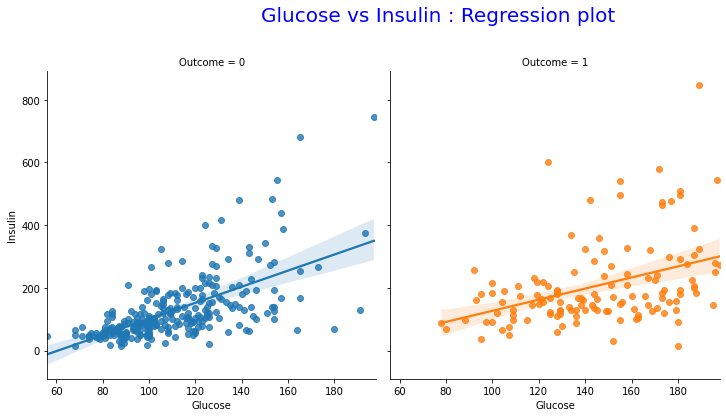

In [48]:
sns.lmplot(x='Glucose', y='Insulin', 
           hue = 'Outcome', col='Outcome', 
           data=filtered_df);

plt.text(0, 1050, s='Glucose vs Insulin : Regression plot', fontdict = {'size':20, 'color':'b'});

# inference --->
    # Insulin value increases with Glucose i.e.positively correlated
    # there is small variation in Insulin value as compared to Glucose, but shows abnormal variations when values are higher
    # Healthy people (Outcome = 0) shows better relationship(Line of Best Fit) between the points than Diabetes people (Outcome = 1)

In [49]:
pd.DataFrame({'Outcome':[1,0],
             'Missing values':[diabetes_copy_class['Insulin'].isnull().sum(), healthy_copy_class['Insulin'].isnull().sum()]},
            index = ['diabetics','healthy'])

,Outcome,Missing values
diabetics,1,138
healthy,0,236


In [50]:
# Imputing and filling the values in Insulin column

fit_model('Glucose','Insulin')
predict_and_fill('Glucose','Insulin')

### 5. SkinThickness

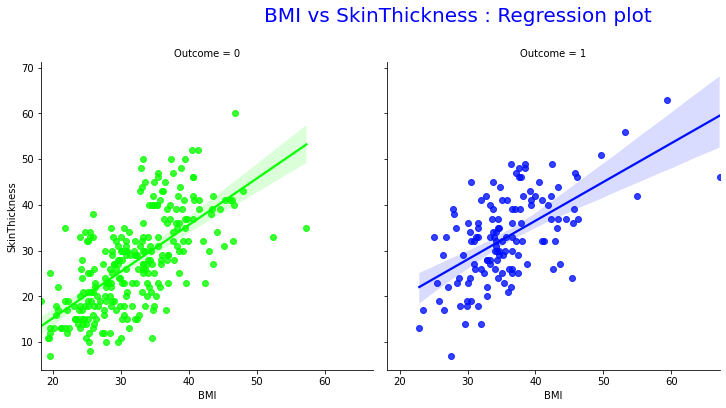

In [51]:
sns.lmplot(x='BMI', y='SkinThickness', 
           hue = 'Outcome', col='Outcome', 
           data=filtered_df, 
           palette = 'hsv');

plt.text(0, 80, s='BMI vs SkinThickness : Regression plot', fontdict = {'size':20, 'color':'b'});

# inference --->
    # SkinThickness increases with BMI i.e.positively correlated
    # Healthy people (Outcome = 0) shows better relationship(Line of Best Fit) between the points than Diabetes people (Outcome = 1)

In [52]:
pd.DataFrame({'Outcome':[1,0],
             'Missing values':[diabetes_copy_class['SkinThickness'].isnull().sum(), healthy_copy_class['SkinThickness'].isnull().sum()]},
            index = ['diabetics','healthy'])

,Outcome,Missing values
diabetics,1,88
healthy,0,139


In [53]:
# Imputing and filling the values in SkinThickness column

fit_model('BMI','SkinThickness')
predict_and_fill('BMI','SkinThickness')

**Updating the Dataframes**

In [54]:
diabetes_copy_class = diabetes_copy_df[diabetes_copy_df.Outcome == 1]
healthy_copy_class = diabetes_copy_df[diabetes_copy_df.Outcome == 0]

## <center><span style="color : #81B214">*EDA after Data Cleaning*</span></center>

In [55]:
# Confirming whether all missing are filled

pd.DataFrame(diabetes_copy_df.isnull().sum(), columns = ['Number of Missing values'])

# inference ---> now, we've cleaned data

,Number of Missing values
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [56]:
diabetes_copy_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,212.574592,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,71.263968,26.6,0.351,31,0
2,8,183.0,64.0,19.383607,291.080494,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,154.255922,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,26.154372,163.228025,30.1,0.349,47,1


In [57]:
diabetes_copy_df.describe().T

# inference ---> Minimum value of Insulin is -20, which can be never ever possible

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.677083,30.464161,44.000000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.428141,12.106044,24.000000,64.00000,72.000000,80.000000,122.00
SkinThickness,768.0,28.637907,9.566080,7.000000,22.00000,28.000000,35.000000,99.00
Insulin,768.0,153.531611,97.228789,-20.700089,90.00000,131.912832,190.144334,846.00
BMI,768.0,32.434635,6.880498,18.200000,27.50000,32.050000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078000,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000000,0.00000,0.000000,1.000000,1.00


In [58]:
# finding which all tuples have Insulin = -20

diabetes_copy_df[diabetes_copy_df.Insulin < 0]

# inference ---> only 1 record has Insulin = -20, whose Outcome is 0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5,44.0,62.0,21.076298,-20.700089,25.0,0.587,36,0


In [59]:
diabetes_copy_df.at[62,'Insulin'] = healthy_copy_class['Insulin'].mean()
diabetes_copy_df.at[62,'Insulin']

128.5867594885303

### # Univariate Analysis

### 1. Visualizing the Pregnancy column

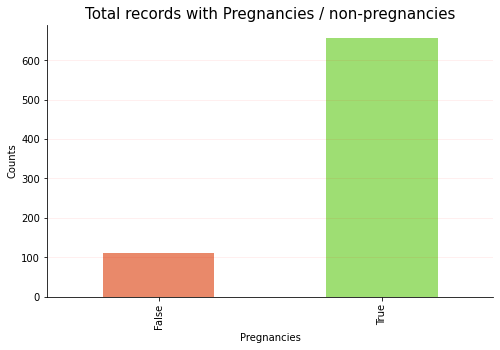

In [60]:
plt.figure(figsize = (8,5))
plt.title("Total records with Pregnancies / non-pregnancies",fontsize = 15)

diabetes_df.groupby([diabetes_df.Pregnancies != 0]).size().plot(kind='bar', color = ['#E9896A', '#9EDE73']);

plt.grid(axis = 'y',alpha = 0.08, color = 'r')
plt.ylabel('Counts');
sns.despine()

# inference ---> 
    # pregnancy records : ~655 & non-pregnancy : ~110
    # Dataset has more female records

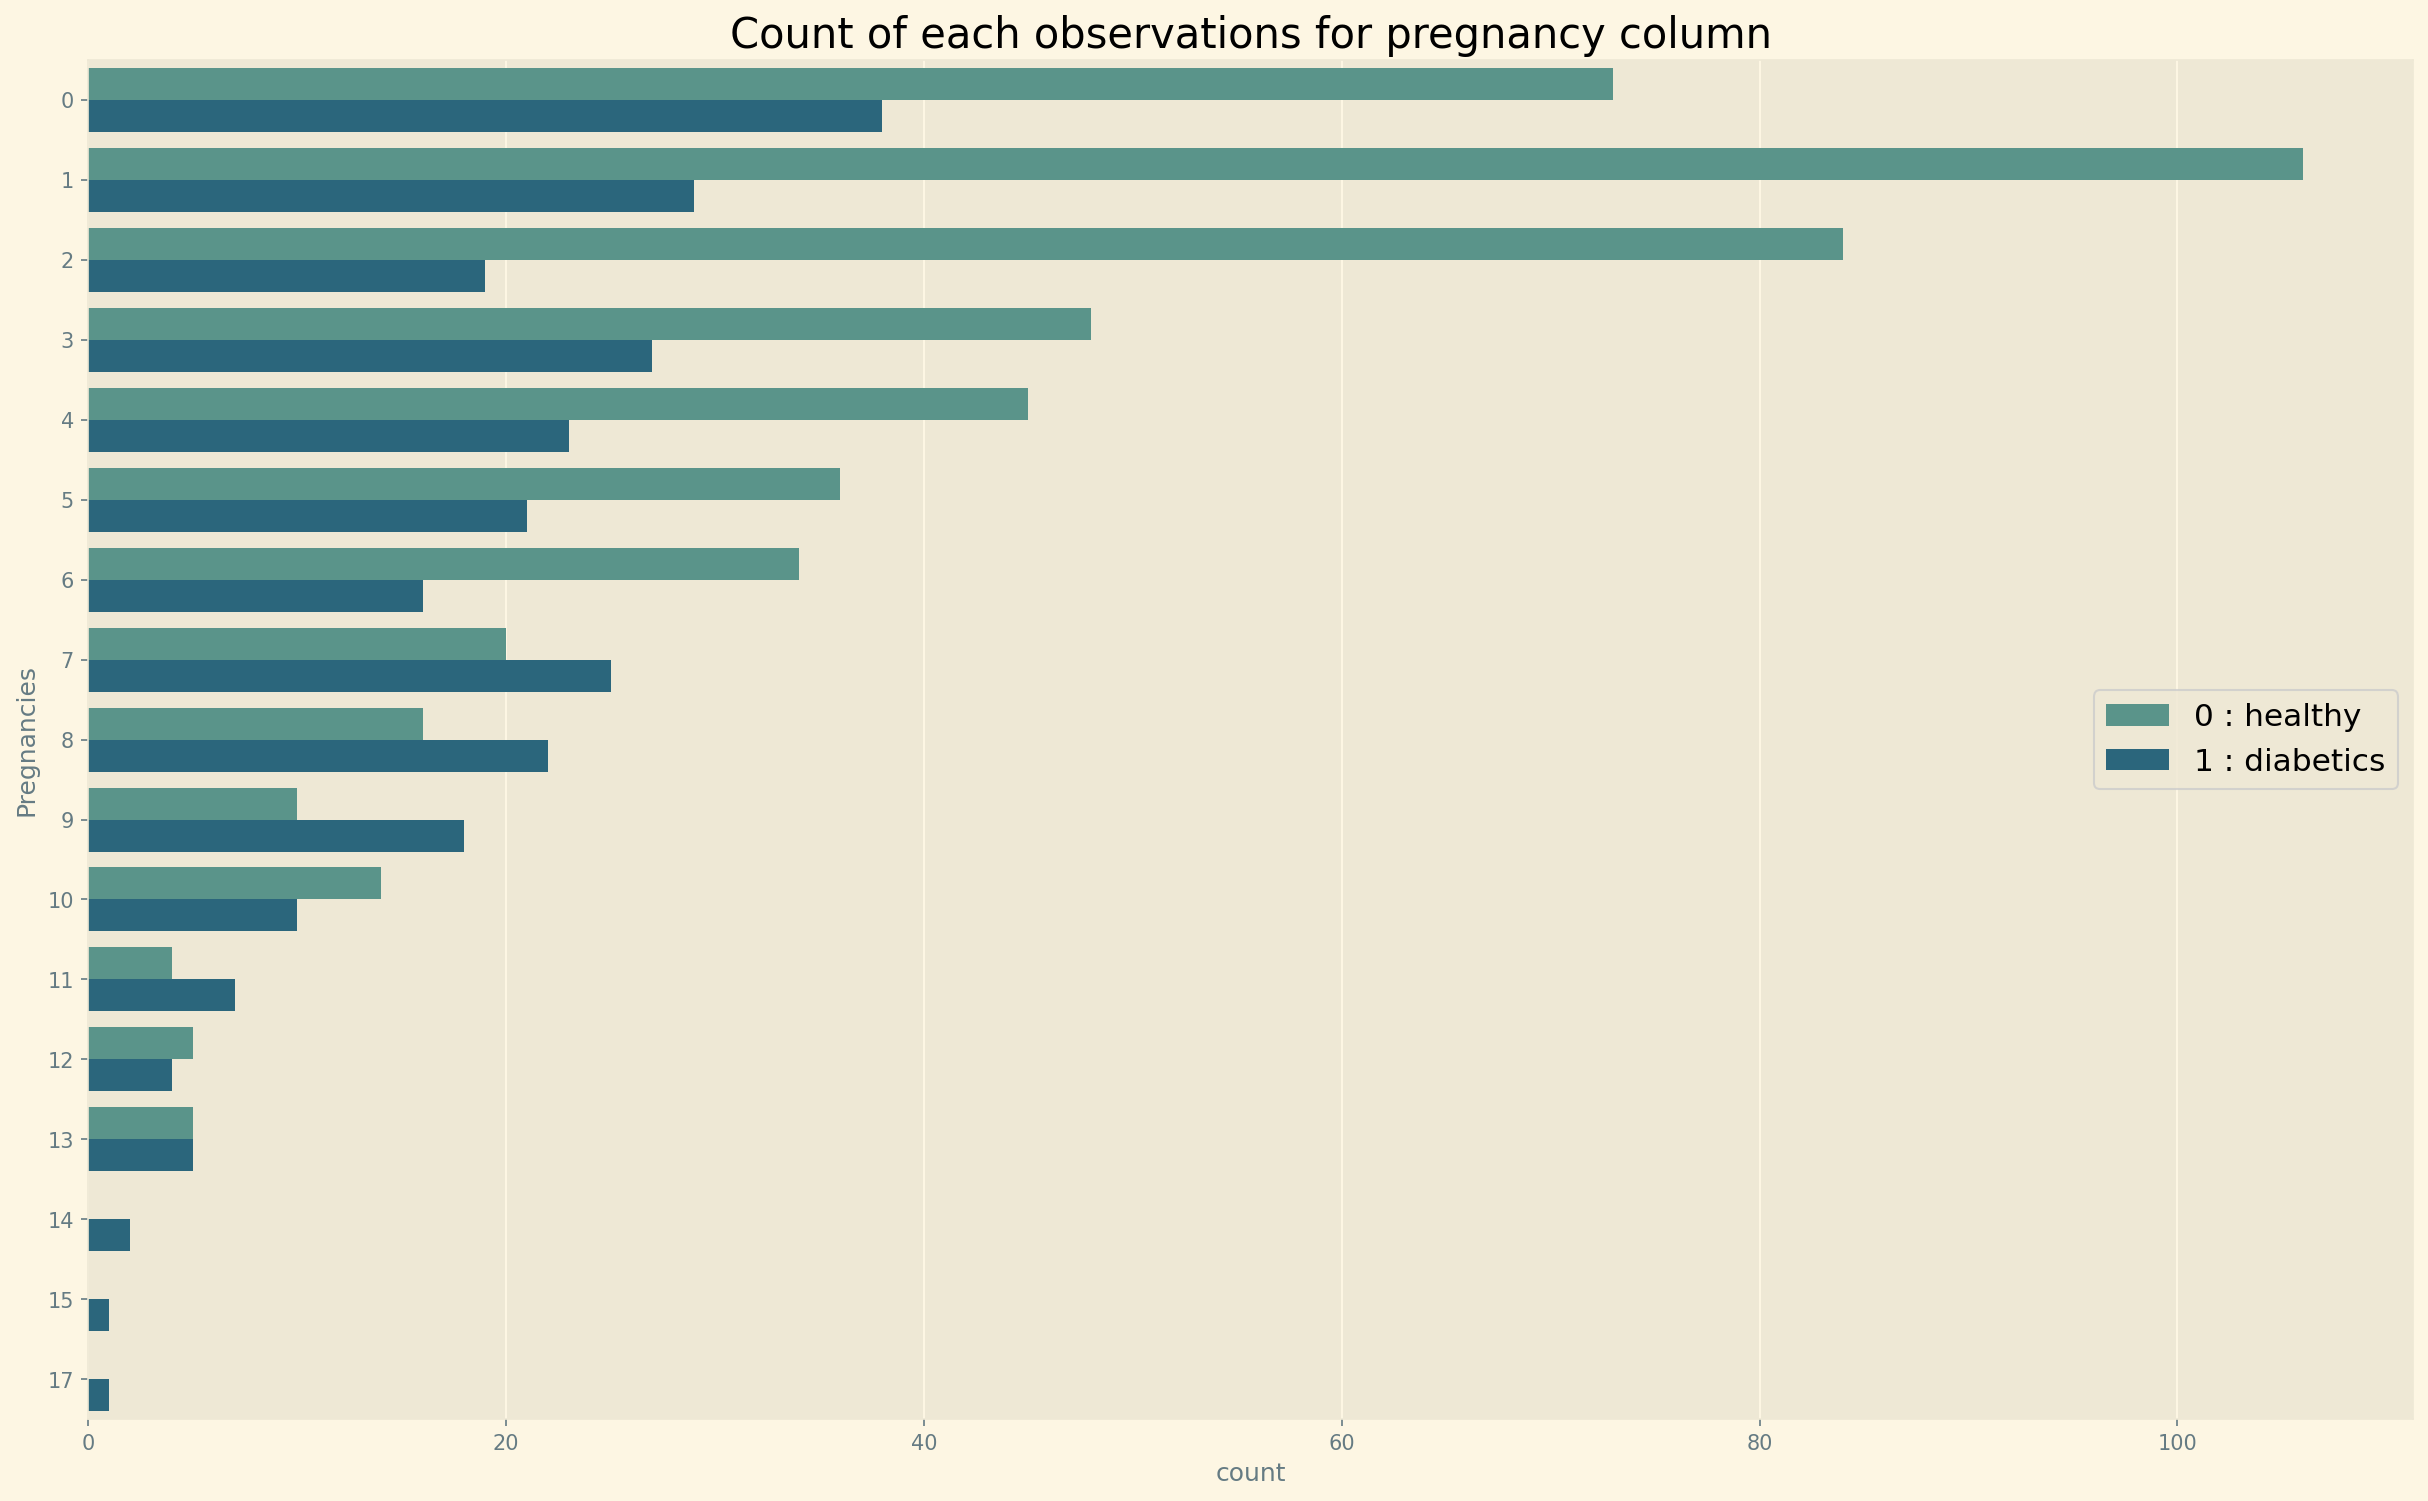

In [61]:
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize = (20,12), dpi = 150)
    plt.title('Count of each observations for pregnancy column',fontsize = 20)

    sns.countplot(y = 'Pregnancies',hue='Outcome', data = diabetes_df,palette ='crest');
    plt.legend(['0 : healthy','1 : diabetics'], fontsize = 15);

# inference ---> most of the records with pregnancies are of healthy people 

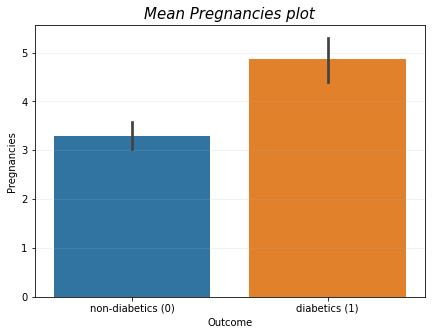

In [62]:
plt.figure(figsize = (7,5))
plt.title('Mean Pregnancies plot', fontstyle = 'italic', fontsize = 15)

ax = sns.barplot(x = 'Outcome', y = 'Pregnancies', data = diabetes_df);

plt.xticks(ticks = [0,1], labels =['non-diabetics (0)', 'diabetics (1)']);
ax.grid(axis = 'y',alpha = 0.2)

# inference ---> people having high pregnancy are more prone to diabetes

### 2. Visualizing the Age Column

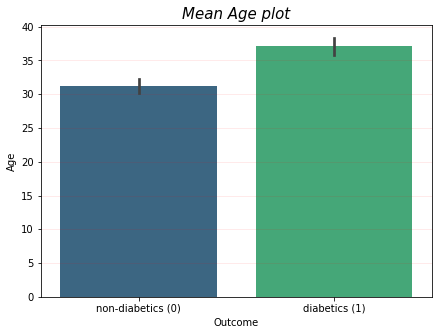

In [63]:
plt.figure(figsize = (7,5))
plt.title('Mean Age plot', fontstyle = 'italic', fontsize = 15)

sns.barplot(x = 'Outcome', y = 'Age', data = diabetes_df, palette= 'viridis');

plt.xticks(ticks = [0,1], labels =['non-diabetics (0)', 'diabetics (1)']);
plt.grid(axis = 'y',alpha = 0.1, color = 'r')

# inference ---> similarly,people with 35+ age are more likely to have diabetes

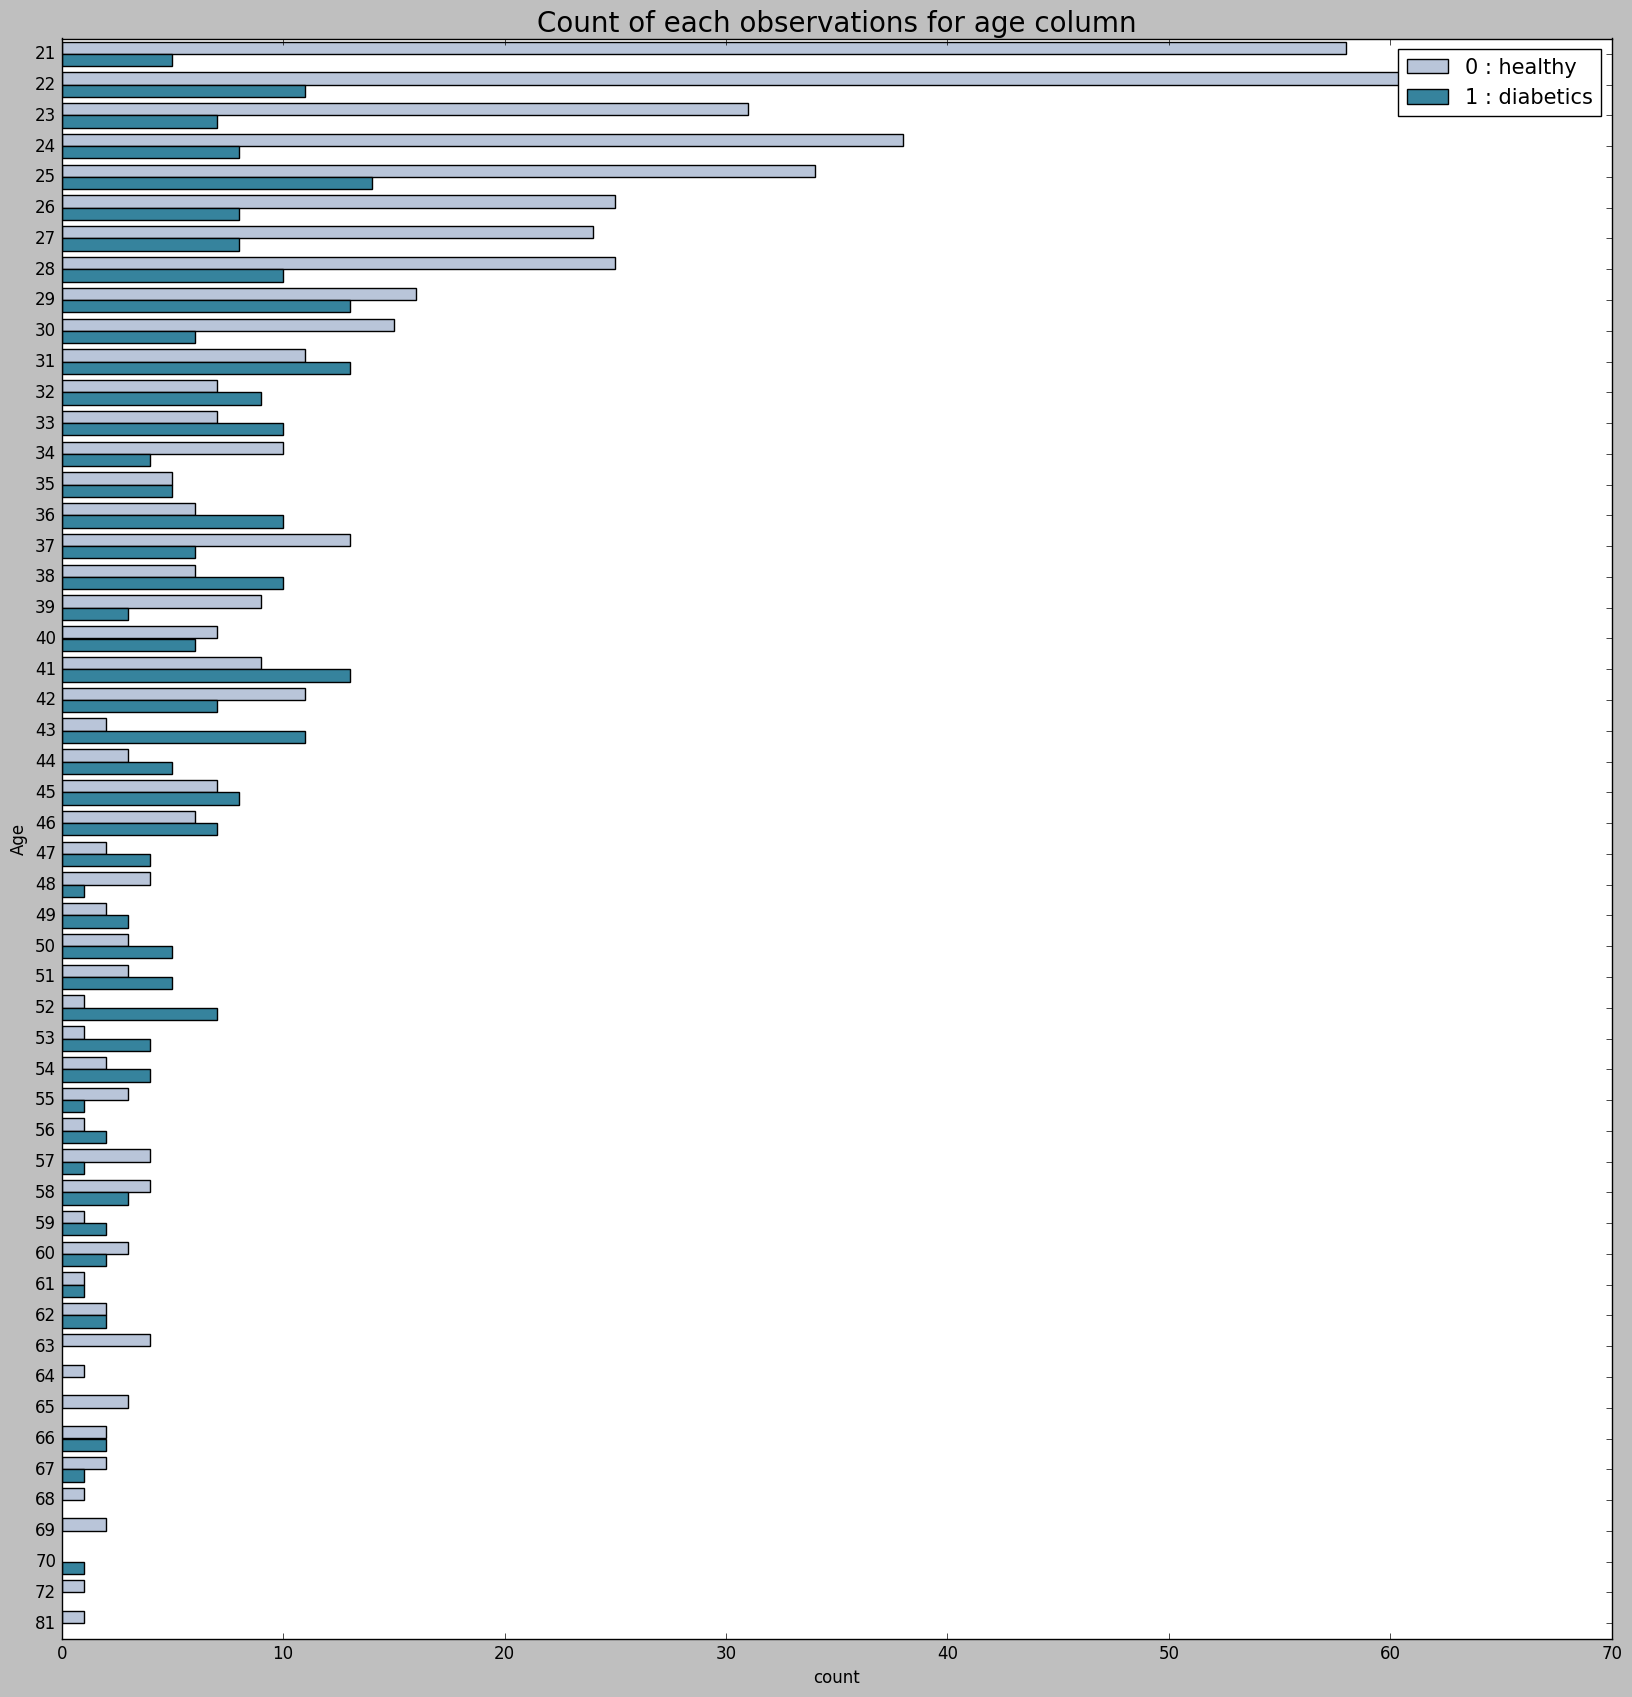

In [64]:
with plt.style.context('classic'):
    plt.figure(figsize = (20,20), dpi = 100)
    plt.title('Count of each observations for age column',fontsize = 20)

    sns.countplot(y = 'Age',hue='Outcome', data = diabetes_df, palette ='PuBuGn');
    plt.legend(['0 : healthy','1 : diabetics'], prop = {'size' : 15});

# inference ---> 
    # almost all age group people can have diabetes
    # minimum age of people is 21 who can have diabetes

### 3. Visualizing the DiabetesPedigreeFunction Column

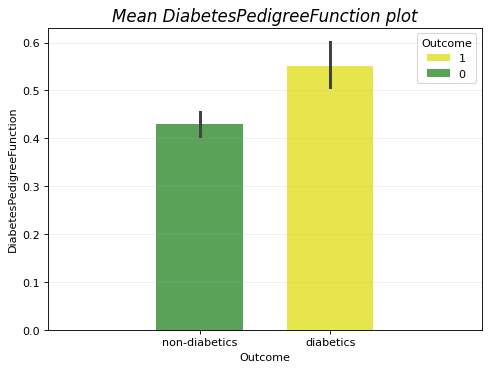

In [65]:
plt.figure(figsize = (7,5), dpi = 80)
plt.title('Mean DiabetesPedigreeFunction plot', fontstyle = 'italic', fontsize = 15)

sns.barplot(x = 'Outcome',
            y = 'DiabetesPedigreeFunction', 
            hue = 'Outcome',
            hue_order = [1,0],
            data = diabetes_df, 
            palette ='Set1_r');

plt.grid(axis = 'y', alpha = 0.2)
plt.xticks(ticks = [1/5,4/5], labels = ['non-diabetics', 'diabetics']);

# inference ---> 
    # DiabetesPedigreeFunction is high in diabetes cases i.e. around 0.55
    # so, DiabetesPedigreeFunction is mainly responsible for diabetics patients

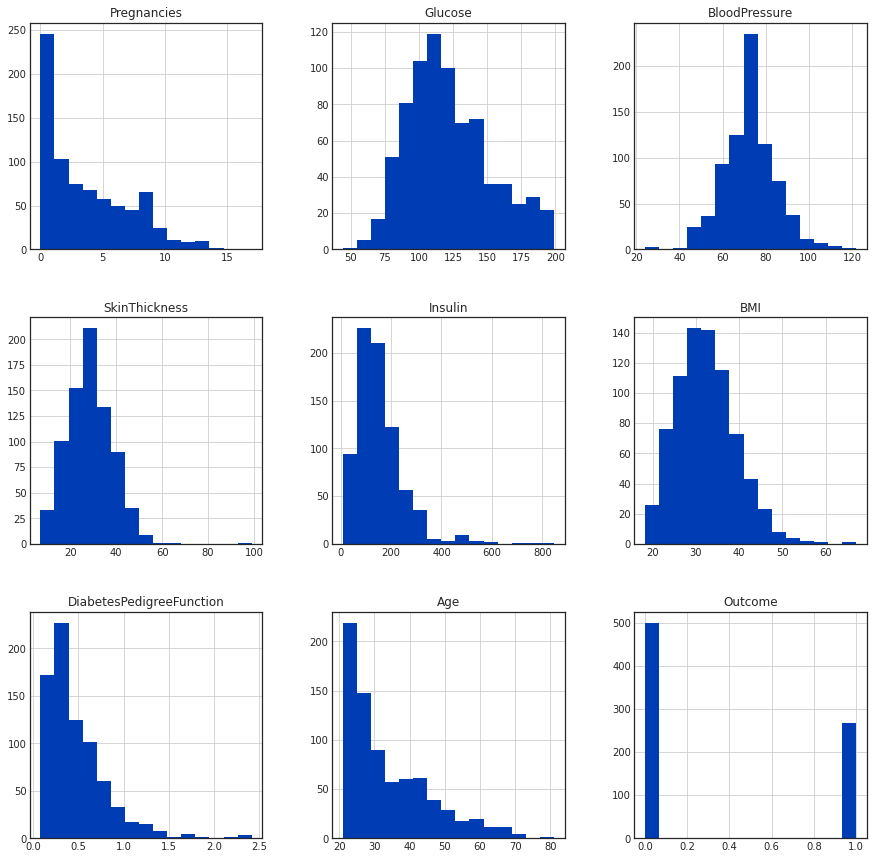

In [66]:
# histogram

with plt.style.context('seaborn-white'):
    diabetes_copy_df.hist(bins = 15,
                         figsize = (15,15),
                         #grid = False,
                         color='#003cb3'); 

# inference ---> 
    # BP has very high records in the middle
    # Now, only Glucose & BP shows Normal Distribution

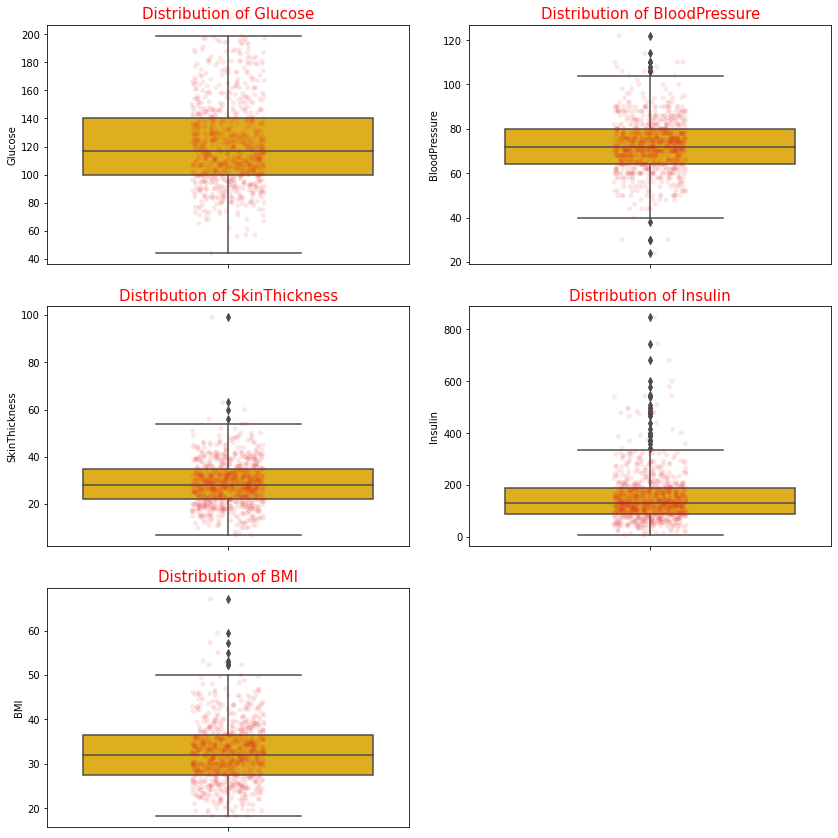

In [67]:
# Visualizing the scattering of data through boxplot and stripplot

plt.figure(figsize = (12,12))

col_list = diabetes_copy_df.columns.unique()

for index,column in enumerate(col_list[1:-3]):
    plt.subplot(3, 2, index+1)

    plt.title(f'Distribution of {column}', fontsize=15, color='r')
    sns.boxplot(y=column, palette='Wistia', data=diabetes_copy_df)
    sns.stripplot(y=column, palette='Set1', data=diabetes_copy_df, alpha=.1)

plt.tight_layout(pad=2)

# inference ---> Now, SkinThickness & Insulin shows the left whisker

### # Bivariate Analysis

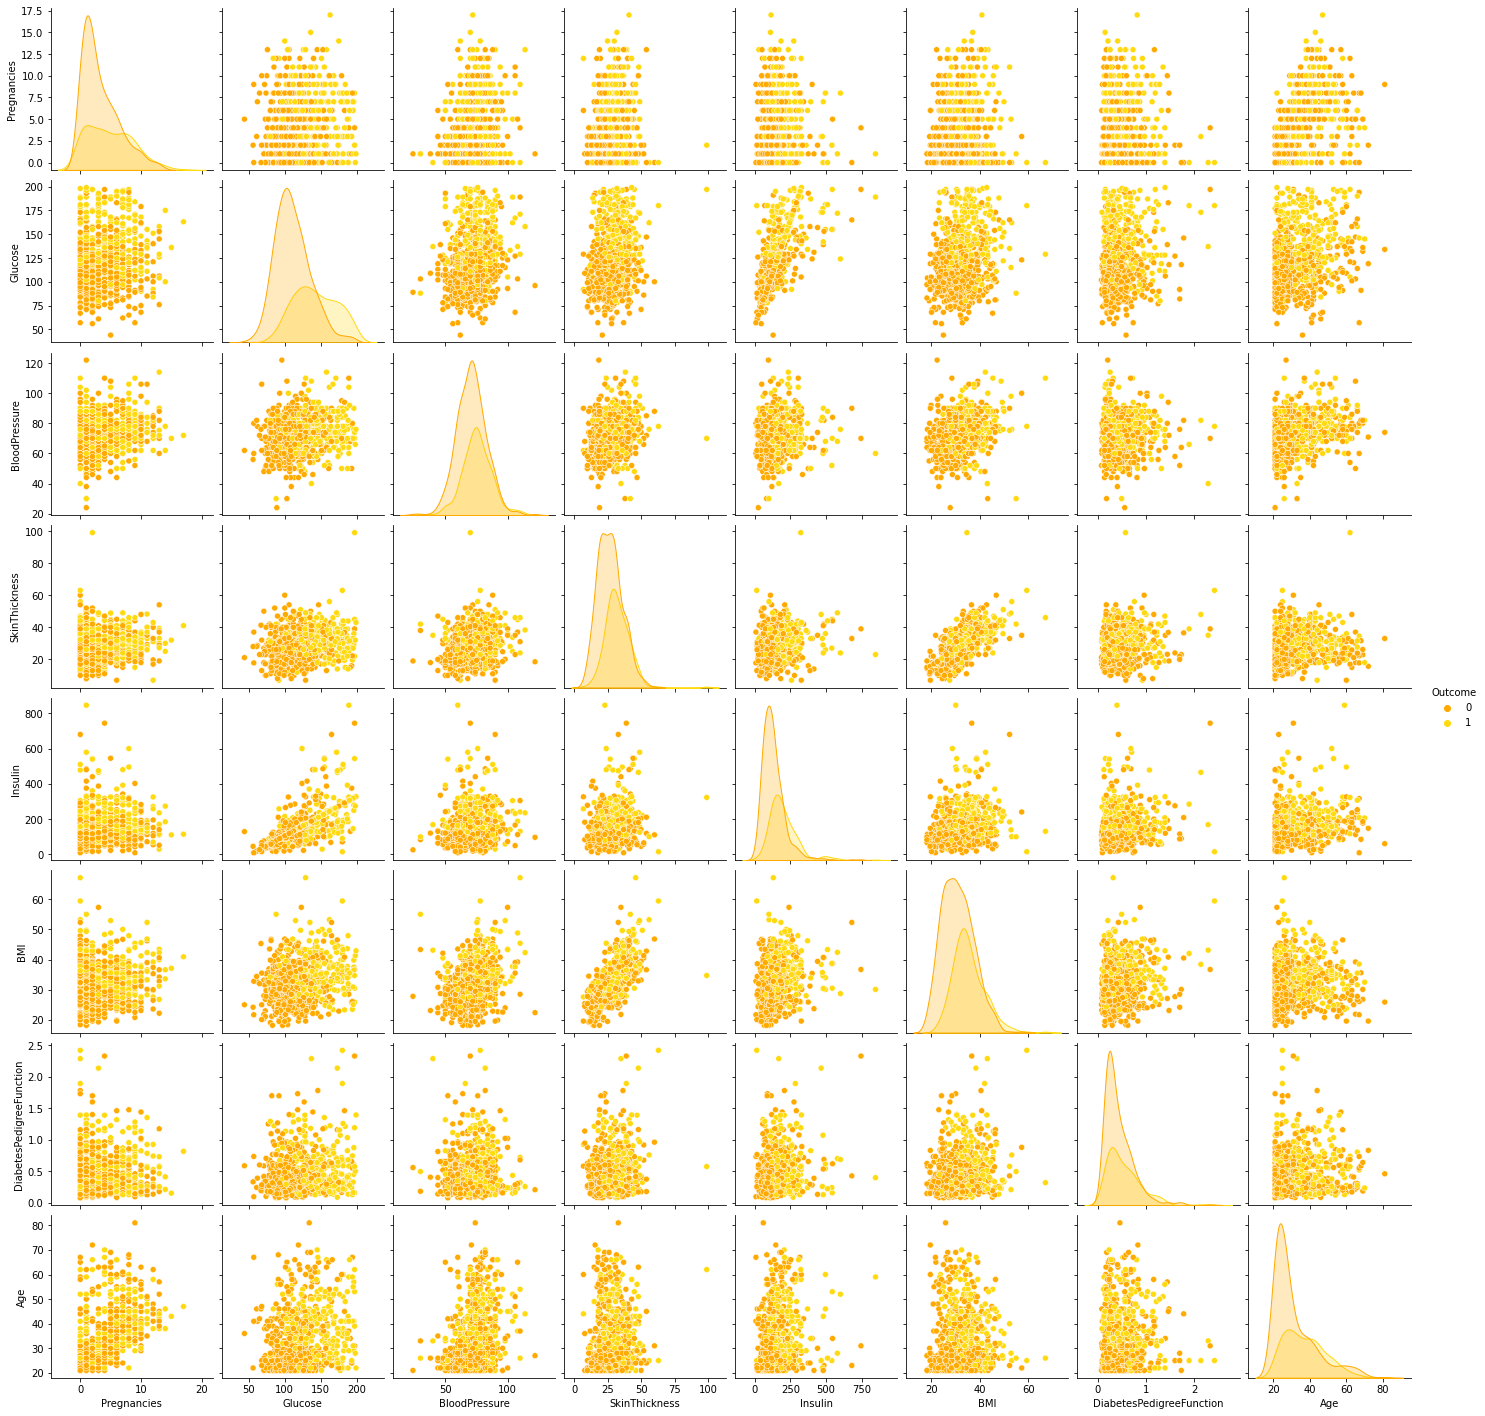

In [68]:
# Observing the scatterness of the data 

sns.pairplot(diabetes_copy_df,hue="Outcome",palette='Wistia_r');

#inference --->
    # In every plot, almost all points of the two class overlaps
    # seems it is difficult to be separate the class(0 or 1) in any of the plots

### # Analysing correlation among the features

In [69]:
corr_matrix = diabetes_copy_df.corr().T
corr_matrix.sort_values(by = 'Outcome', ascending = False)

# inference---> it is observed that Glucose has high correlation with Outcome

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.495990,0.175087,0.269469,0.349915,0.315577,0.173844,0.238356,1.000000
Glucose,0.130155,1.000000,0.224665,0.220056,0.699127,0.236171,0.138353,0.268910,0.495990
Insulin,0.072256,0.699127,0.141192,0.200685,1.000000,0.232063,0.131584,0.200748,0.349915
BMI,0.023890,0.236171,0.286062,0.714502,0.232063,1.000000,0.152771,0.027849,0.315577
SkinThickness,0.081297,0.220056,0.222726,1.000000,0.200685,0.714502,0.125934,0.096956,0.269469
Age,0.544341,0.268910,0.324439,0.096956,0.200748,0.027849,0.033561,1.000000,0.238356
Pregnancies,1.000000,0.130155,0.208935,0.081297,0.072256,0.023890,-0.033523,0.544341,0.221898
BloodPressure,0.208935,0.224665,1.000000,0.222726,0.141192,0.286062,-0.002264,0.324439,0.175087
DiabetesPedigreeFunction,-0.033523,0.138353,-0.002264,0.125934,0.131584,0.152771,1.000000,0.033561,0.173844


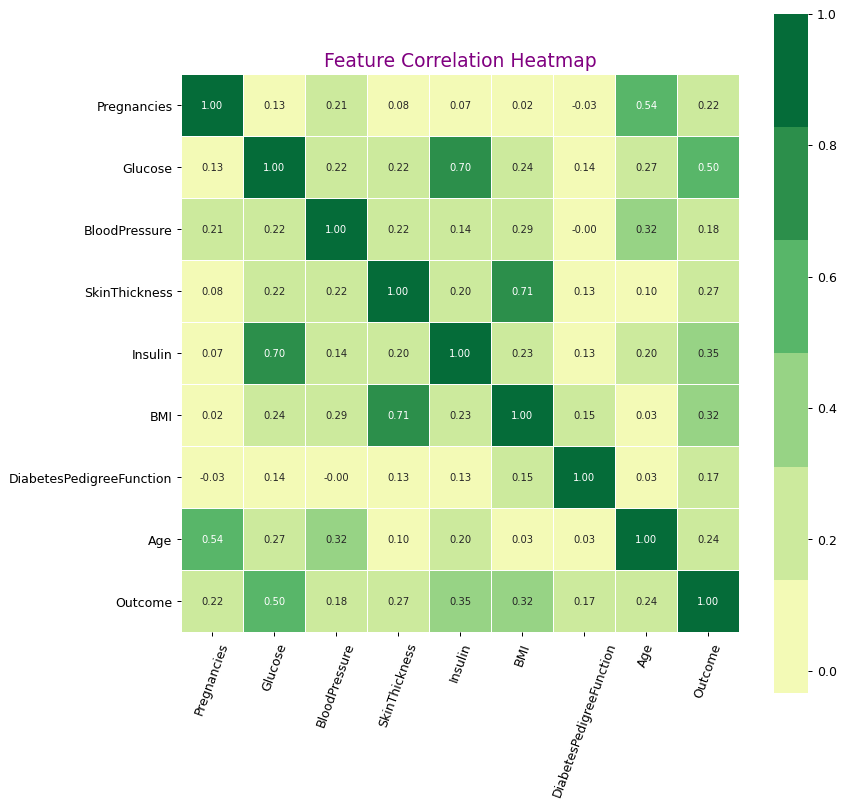

In [70]:
# Visualizing Correlation with heatmap :

plt.figure(figsize=(10,10),dpi=90)
plt.title('Feature Correlation Heatmap',fontsize=15,color='purple')

sns.heatmap(diabetes_copy_df.corr(),
            annot = True,
            annot_kws = {'size':8},
            fmt = '.2f',
            cmap = sns.color_palette('YlGn'),
            linewidths = .5,    
            square = True);

plt.xticks(rotation=70);

# inference--->
    ## Looking at the last column :
        ## Outcome is highly dependent on Glucose, as it has very high correlation value.
        ## BMI and Insulin also have good correlation with Outcome indicating they also play a vital role in prediction.
    
    ## Now,Focusing inside the matrix :
        ## In addition,Glucose shows strong relation with Insulin.
        ## Likewise,SkinThickness and BMI have correlation of 0.71.
        ## Besides,Pregnancies and Age also has correlation value=0.54 suggesting it may have some effect on Outcome.

In [71]:
# helper function 

def impact_plot(feature):
    fig,axes = plt.subplots(1,2,figsize=(20,6))
    
    plt.suptitle(f'Impact of {feature} on Outcome', fontsize = 25)
    
    sns.distplot(healthy_copy_class[feature], ax = axes[0])
    sns.distplot(diabetes_copy_class[feature], ax = axes[0])
    axes[0].legend(['Non-diabetics','Diabetics'])

    sns.boxplot(x = 'Outcome', y = feature,
               data = diabetes_copy_df,
               hue  = 'Outcome', 
               ax = axes[1])
    axes[1].legend(['0 : Non-diabetics','1 : Diabetics'])

### 1. Glucose

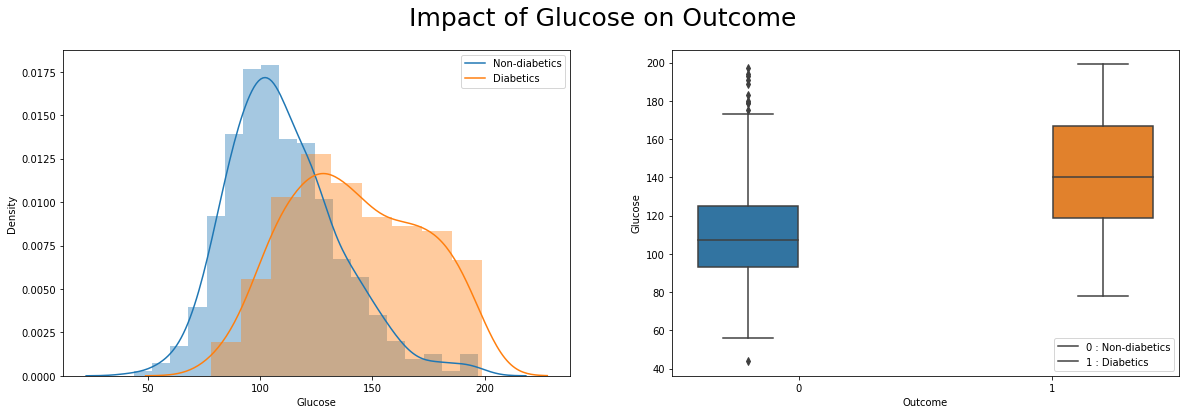

In [72]:
impact_plot('Glucose')

# inference ---> diabetics people have more plasma Glucose concentration

### 2. Insulin

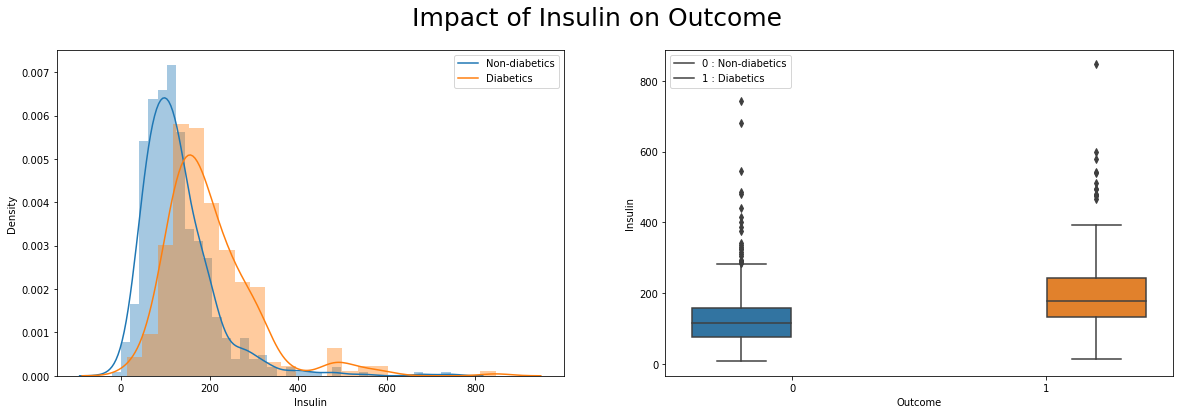

In [73]:
impact_plot('Insulin')

# inference ---> diabetics people have more Insulin

### 3. BMI

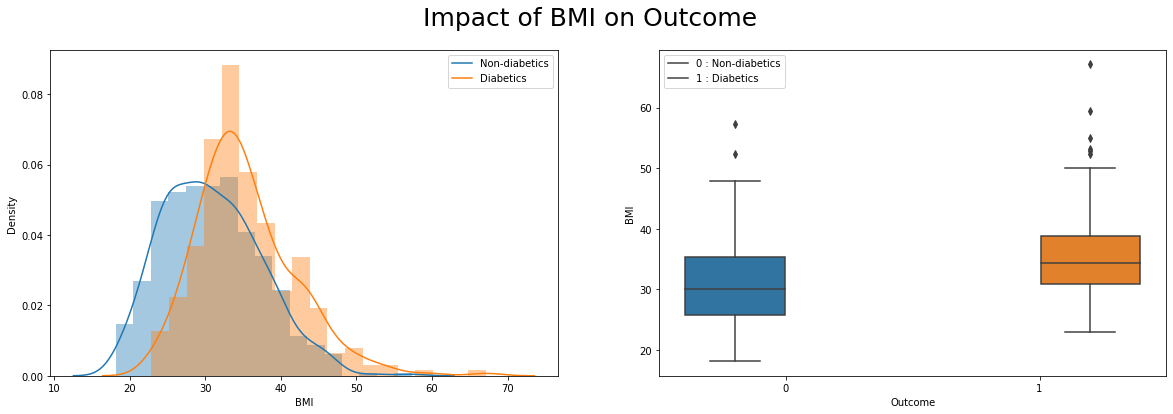

In [74]:
impact_plot('BMI')

# inference ---> diabetics people have more BMI

In [75]:
# helper  function

def scatter_plot(feature_x, feature_y, origin = (0,0), width = 0, height = 0):
    plt.figure(figsize = (13,8))
    plt.title(f'Impact of {feature_x} and {feature_y} on Outcome\n', fontsize = 20)
    sns.scatterplot(x = feature_x, y = feature_y,
                    hue = 'Outcome',
                   data = diabetes_copy_df)
    plt.legend(['diabetics','healthy'], fontsize = 12);
    plt.grid(True)

    # highlighting the interest area
    rect = mplpatch.Rectangle(origin, width , height, fill = False, linewidth = 2)
    plt.gca().add_patch(rect);

### 4. Glucose along with Insulin

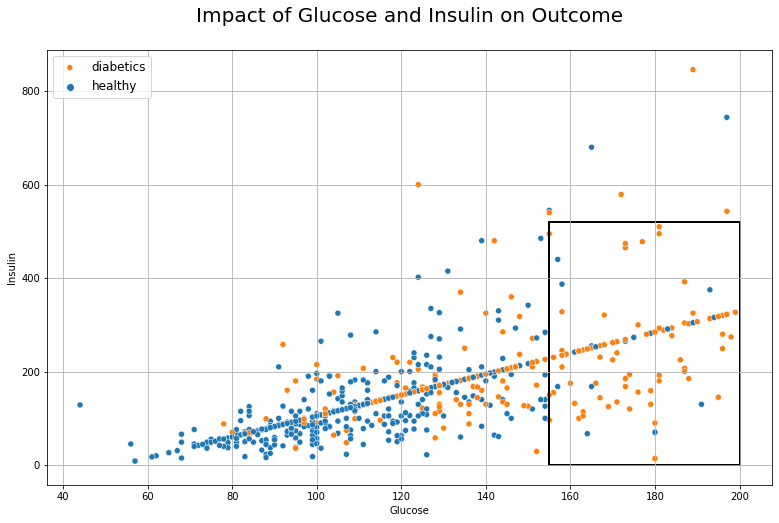

In [76]:
scatter_plot('Glucose','Insulin', (155,0), width = 45, height = 520)

# inference ---> Rectangular patch indicates that people with high Glucose and low Insulin are more prob to diabetes

### 4. BMI along with SkinThickness

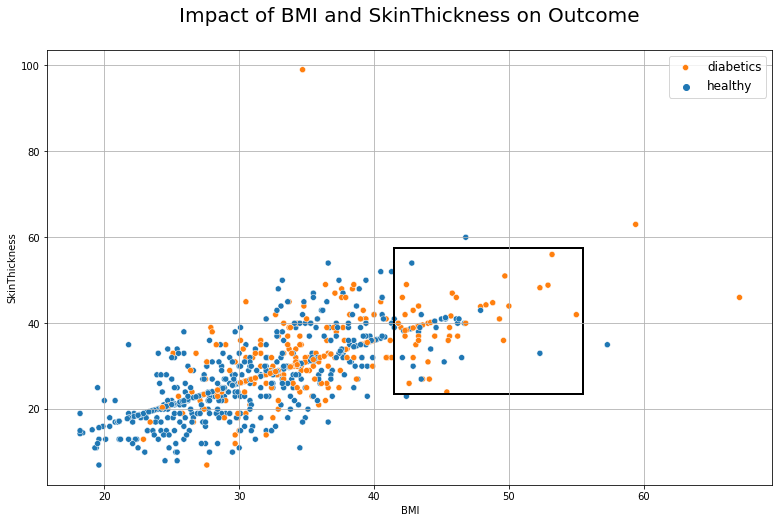

In [77]:
scatter_plot('BMI', 'SkinThickness', (41.5,23.5), width = 14, height = 34)

# inference ---> Rectangular patch indicates that people having high BMI and less SkinThickness are more prob to diabetes

### 4. Age along with Pregnancies

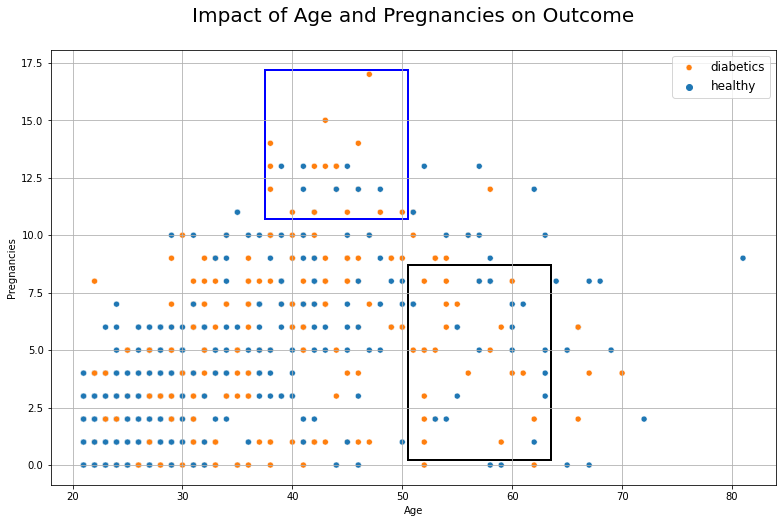

In [78]:
scatter_plot('Age', 'Pregnancies', (50.5,0.2), width = 13, height = 8.5)

rect = mplpatch.Rectangle((37.5,10.7), width = 13, height = 6.5, fill = False, linewidth = 2, color = 'b')
plt.gca().add_patch(rect);

# inference --->
# blue rectangular patch indicates that female with higher number of frequencies having age in range (37-11) become diabetics
# black rectangular patch suggests that older people( age>50) are also diabetics

## <center><span style="color : #81B214">*Feature Selection*</span></center>

In [79]:
# splitting feature and target variables

X = diabetes_copy_df.drop('Outcome', axis = 1)
y = diabetes_copy_df['Outcome']

## <center><span style="color : #81B214">*Data splitting*</span></center>

In [80]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)

In [81]:
# looking for the shape of training  testing data

X_train.shape, X_test.shape

# training data has 614 records & testing data has 154 tuples

((614, 8), (154, 8))

## <center><span style="color : #81B214">*Data pre-processing - Feature Scaling*</span></center>

Since, **Glucose & BP** shows Gaussian Distribution, it will be **standardized**. \
**SkinThickness, Insulin, BMI,	DiabetesPedigreeFunction, Age** will be **normalized**.

In [82]:
# initializing the scalers
standardize_sc = StandardScaler()
normalize_sc = MinMaxScaler()

# separating the columns which are to be standardized & normalized
standardized_var = ['Glucose','BloodPressure']
normalized_var = ['SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Pregnancies']

In [83]:
# scaling the X_train data & fitting it to respective scaler

standardize_col = standardize_sc.fit_transform(X_train[standardized_var])
standardize_col = pd.DataFrame(standardize_col, columns = standardized_var)

normalize_col = normalize_sc.fit_transform(X_train[normalized_var])
normalize_col = pd.DataFrame(normalize_col, columns = normalized_var)

# joining all the columns
X_train = pd.concat([standardize_col, normalize_col], axis = 1)
X_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.392424,-0.214103,0.173913,0.145116,0.351738,0.196062,0.133333,0.400000
1,-0.098439,-0.139863,0.155168,0.166043,0.143149,0.053510,0.266667,0.466667
2,-0.883819,-1.568012,0.076087,0.094969,0.161554,0.284247,0.016667,0.133333
3,-0.458405,-2.414206,0.141304,0.145116,0.118609,0.312072,0.233333,0.400000
4,1.112355,1.139806,0.228261,0.174966,0.329243,0.473031,0.350000,0.600000
...,...,...,...,...,...,...,...,...
609,-0.327508,0.124374,0.250000,0.147296,0.274029,0.048373,0.066667,0.200000
610,-0.425681,-1.060296,0.217391,0.139262,0.139059,0.052226,0.100000,0.400000
611,-0.360232,-0.721819,0.347826,0.144618,0.327198,0.075342,0.050000,0.400000
612,1.374149,0.970568,0.152174,0.286558,0.257669,0.319777,0.183333,0.600000


In [84]:
# predicting and scaling the X_test data

standardize_col = standardize_sc.transform(X_test[standardized_var])
standardize_col = pd.DataFrame(standardize_col, columns = standardized_var)

normalize_col = normalize_sc.transform(X_test[normalized_var])
normalize_col = pd.DataFrame(normalize_col, columns = normalized_var)

# joining all the columns
X_test = pd.concat([standardize_col, normalize_col], axis = 1)
X_test

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,1.341424,-0.214103,0.119565,0.115267,0.274029,0.078767,0.116667,0.200000
1,-1.571027,-0.214103,0.358696,0.048405,0.349693,0.265839,0.300000,0.533333
2,-1.603751,-1.906490,0.032609,0.042850,0.098160,0.070205,0.000000,0.066667
3,0.457872,0.801329,0.208200,0.211571,0.243354,0.238014,0.800000,0.333333
4,-1.047440,-0.891058,0.119565,0.060344,0.141104,0.506849,0.066667,0.066667
...,...,...,...,...,...,...,...,...
149,-1.080164,-4.106593,0.130435,0.019749,0.196319,0.203339,0.000000,0.066667
150,-0.262060,-0.552580,0.315217,0.228694,0.406953,0.087757,0.000000,0.066667
151,0.588769,0.801329,0.391304,0.377941,0.429448,0.190068,0.616667,0.800000
152,-0.163887,-0.721819,0.217391,0.133177,0.306748,0.062500,0.050000,0.266667


## <center><span style="color : #81B214">*Model Building & Evaluation*</span></center>

### 1. LogisticRegression

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       102
           1       0.89      0.60      0.71        52

    accuracy                           0.84       154
   macro avg       0.85      0.78      0.80       154
weighted avg       0.84      0.84      0.83       154



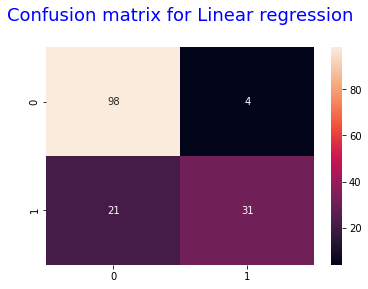

In [85]:
# initializing the model
lr_classifier = LogisticRegression()

# training the model
lr_classifier.fit(X_train, y_train)       

# predicting
y_predict = lr_classifier.predict(X_test) 

# printing the score
print(classification_report(y_test, y_predict))
lr_as = accuracy_score(y_test, y_predict)

# visualizing confusion matrix
cm = confusion_matrix(y_test, y_predict)

plt.title('Confusion matrix for Linear regression\n', fontdict = {'size':18, 'color':'b'})
sns.heatmap(cm, annot = True);

### 2. Support Vector Machine

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       102
           1       0.85      0.56      0.67        52

    accuracy                           0.82       154
   macro avg       0.83      0.75      0.77       154
weighted avg       0.82      0.82      0.81       154



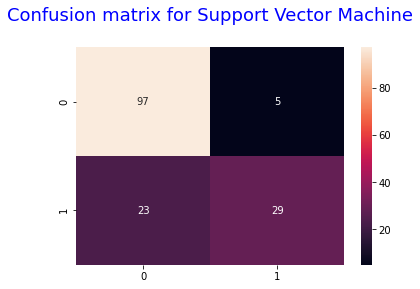

In [86]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

y_predict = svc_classifier.predict(X_test)

print(classification_report(y_test, y_predict))
svc_as = accuracy_score(y_test, y_predict)

cm = confusion_matrix(y_test, y_predict)

plt.title('Confusion matrix for Support Vector Machine\n', fontdict = {'size':18, 'color':'b'})
sns.heatmap(cm, annot = True);

### 3. K-Nearest Neighbors

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       102
           1       0.83      0.56      0.67        52

    accuracy                           0.81       154
   macro avg       0.82      0.75      0.77       154
weighted avg       0.81      0.81      0.80       154



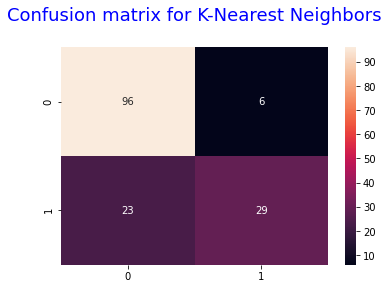

In [87]:
knn_classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

y_predict = knn_classifier.predict(X_test)

print(classification_report(y_test, y_predict))
knn_as = accuracy_score(y_test, y_predict)

cm = confusion_matrix(y_test, y_predict)

plt.title('Confusion matrix for K-Nearest Neighbors\n', fontdict = {'size':18, 'color':'b'})
sns.heatmap(cm, annot = True);

### 4. Decision Tree

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       102
           1       0.56      0.56      0.56        52

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



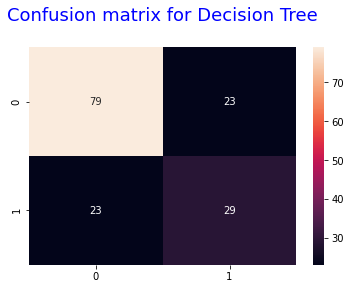

In [88]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy')
dt_classifier.fit(X_train, y_train)

y_predict = dt_classifier.predict(X_test)

print(classification_report(y_test, y_predict))
dt_as = accuracy_score(y_test, y_predict)

cm = confusion_matrix(y_test, y_predict)

plt.title('Confusion matrix for Decision Tree\n', fontdict = {'size':18, 'color':'b'})
sns.heatmap(cm, annot = True);

### 5. Random Forest

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       102
           1       0.74      0.62      0.67        52

    accuracy                           0.80       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.80      0.79       154



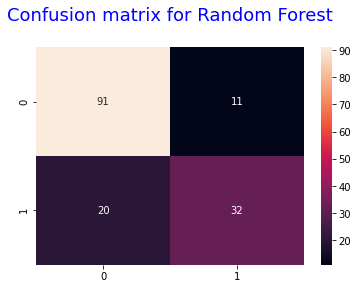

In [89]:
rt_classifier = RandomForestClassifier(n_estimators = 120, criterion = 'gini')
rt_classifier.fit(X_train, y_train)

y_predict = rt_classifier.predict(X_test)

print(classification_report(y_test, y_predict))
rf_as = accuracy_score(y_test, y_predict)

cm = confusion_matrix(y_test, y_predict)

plt.title('Confusion matrix for Random Forest\n', fontdict = {'size':18, 'color':'b'})
sns.heatmap(cm, annot = True);

### 6. Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       102
           1       0.73      0.67      0.70        52

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



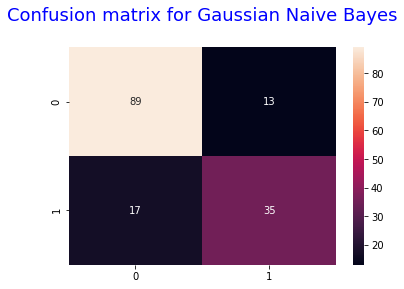

In [90]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

y_predict = gnb_classifier.predict(X_test)

print(classification_report(y_test, y_predict))
gnb_as = accuracy_score(y_test, y_predict)

cm = confusion_matrix(y_test, y_predict)

plt.title('Confusion matrix for Gaussian Naive Bayes\n', fontdict = {'size':18, 'color':'b'})
sns.heatmap(cm, annot = True);

### 7. Adaptive Boosting

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       102
           1       0.78      0.67      0.72        52

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



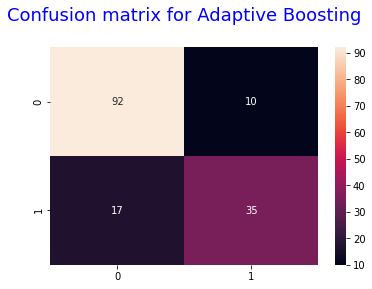

In [91]:
ab_classifier = AdaBoostClassifier()
ab_classifier.fit(X_train, y_train)

y_predict = ab_classifier.predict(X_test)

print(classification_report(y_test, y_predict))
ab_as = accuracy_score(y_test, y_predict)

cm = confusion_matrix(y_test, y_predict)

plt.title('Confusion matrix for Adaptive Boosting\n', fontdict = {'size':18, 'color':'b'})
sns.heatmap(cm, annot = True);

### 8. Gradient Boosting

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       102
           1       0.72      0.69      0.71        52

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154



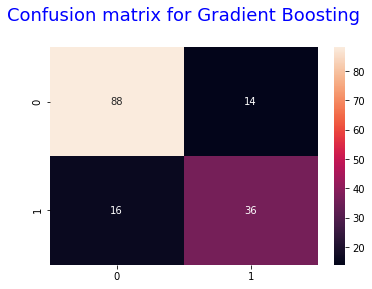

In [92]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

y_predict = gb_classifier.predict(X_test)

print(classification_report(y_test, y_predict))
gb_as = accuracy_score(y_test, y_predict)

cm = confusion_matrix(y_test, y_predict)

plt.title('Confusion matrix for Gradient Boosting\n', fontdict = {'size':18, 'color':'b'})
sns.heatmap(cm, annot = True);

### 9. Extreme Gradient Boosting

[21:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       102
           1       0.70      0.63      0.67        52

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154



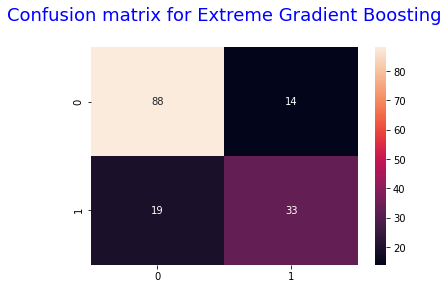

In [93]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_predict = xgb_classifier.predict(X_test)

print(classification_report(y_test, y_predict))
xgb_as = accuracy_score(y_test, y_predict)

cm = confusion_matrix(y_test, y_predict)

plt.title('Confusion matrix for Extreme Gradient Boosting\n', fontdict = {'size':18, 'color':'b'})
sns.heatmap(cm, annot = True);

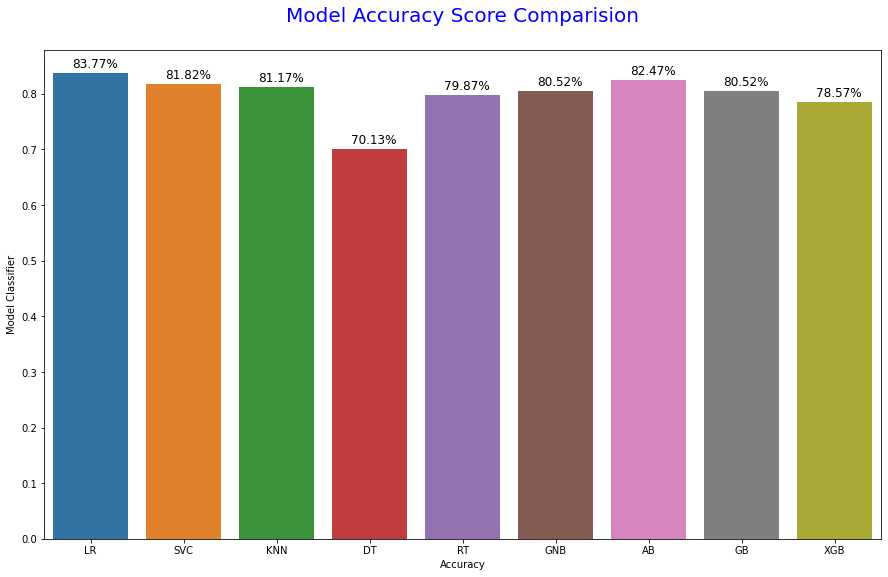

In [94]:
# comparing the models

model = ['LR', 'SVC', 'KNN', 'DT', 'RT', 'GNB', 'AB', 'GB', 'XGB']
accuracy = [lr_as, svc_as, knn_as, dt_as, rf_as, gnb_as, ab_as, gb_as, xgb_as]

plt.figure(figsize = (15,9))
plt.title('Model Accuracy Score Comparision\n', fontsize = 20, color = 'b')

ax = sns.barplot(x = model, y = accuracy)
ax.set(xlabel = 'Accuracy',ylabel = 'Model Classifier')

for x_idx, y in enumerate(accuracy):
    plt.text(x_idx-0.2, y+0.01, f'{y*100:.2f}%', fontsize = 12)
    
# inference ---> LogisticRegression has performed much better than other classifiers, having accuracy score around 84%

## <center><span style="color : #81B214">*HYPERPARAMETER TUNING --> Model Improvement for LogisticRegression Classifier*</span></center>

In [95]:
# setting the parameters for LogisticRegression Classifier

parameter = [
    {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(0,10,20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 500, 1000, 2500, 5000]
    }
]

In [96]:
# Using GridSearchCV() to train the LogisticRegression() model

classifier = GridSearchCV(estimator = LogisticRegression(), param_grid = parameter, verbose = True)
tuned_lr = classifier.fit(X_train, y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


              precision    recall  f1-score   support

           0       0.82      0.95      0.88       102
           1       0.86      0.60      0.70        52

    accuracy                           0.83       154
   macro avg       0.84      0.77      0.79       154
weighted avg       0.84      0.83      0.82       154

 Accuracy Score after Hyperparameter Tuning : 83.12% 


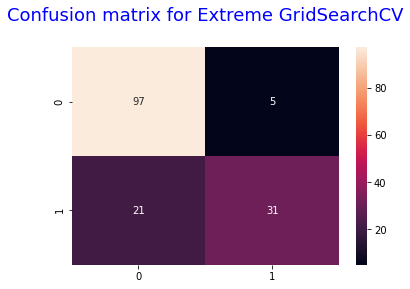

In [97]:
y_predict = tuned_lr.predict(X_test)

print(classification_report(y_test, y_predict))
print(f'\033[1m Accuracy Score after Hyperparameter Tuning : {accuracy_score(y_test, y_predict)*100 :.2f}% \033[0m')

cm = confusion_matrix(y_test, y_predict)

plt.title('Confusion matrix for Extreme GridSearchCV\n', fontdict = {'size':18, 'color':'b'})
sns.heatmap(cm, annot = True);

# inference ---> model tuning didn't improve the performance of classifier, so maximum accuracy attained is ~84%

In [98]:
lr_classifier.get_params(True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [99]:
lr_classifier.predict_proba(X_test)

array([[0.43532821, 0.56467179],
       [0.84871917, 0.15128083],
       [0.97384068, 0.02615932],
       [0.50569169, 0.49430831],
       [0.91472834, 0.08527166],
       [0.18368062, 0.81631938],
       [0.70465367, 0.29534633],
       [0.85190289, 0.14809711],
       [0.81288766, 0.18711234],
       [0.86548246, 0.13451754],
       [0.75337089, 0.24662911],
       [0.59937224, 0.40062776],
       [0.24376016, 0.75623984],
       [0.1177217 , 0.8822783 ],
       [0.61647309, 0.38352691],
       [0.65881433, 0.34118567],
       [0.14856035, 0.85143965],
       [0.78436146, 0.21563854],
       [0.90673303, 0.09326697],
       [0.6037432 , 0.3962568 ],
       [0.94912994, 0.05087006],
       [0.64255369, 0.35744631],
       [0.67742044, 0.32257956],
       [0.90099016, 0.09900984],
       [0.82921546, 0.17078454],
       [0.94439934, 0.05560066],
       [0.08048607, 0.91951393],
       [0.8817761 , 0.1182239 ],
       [0.9126662 , 0.0873338 ],
       [0.8861415 , 0.1138585 ],
       [0.

In [100]:
lr_classifier.coef_[0]

array([ 1.06397465, -0.00619875,  1.19809229, -0.06351782,  2.51496082,
        0.94812264,  0.50375859,  1.08982624])